# 0. Distributed Queries

In [1]:
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt

In [2]:
n_queries = [1, 2, 10, 20]
query_data = {'Cloud Vision': [446.68 / 1, 353.61 / 2, 684.25 / 10, 1124.82 / 20], 
               'Imagga': [1688.11 / 1, 2331.81 / 2, 10775.75 / 10, 21971.77 / 20], 
               'DeepAPI': [538.47 / 1, 643.17 / 2, 1888.81 / 10, 1686.36 / 20]
             }

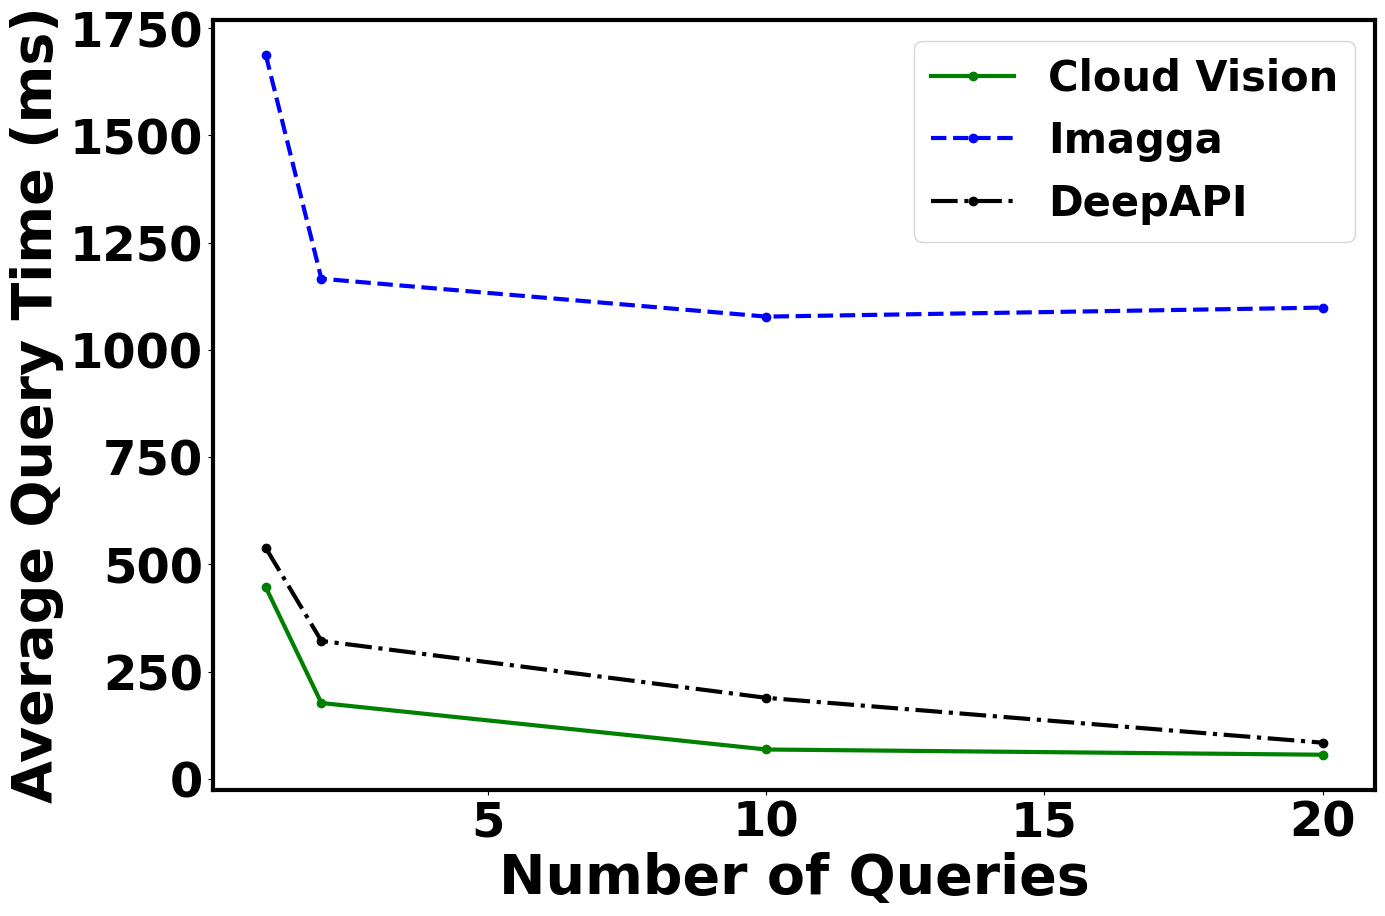

In [3]:
labels = [r'Cloud Vision', 'Imagga', 'DeepAPI']

parameters = {'axes.labelsize': 40,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (30, 8),
              'font.size': 20,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

f, (ax1) = plt.subplots(nrows = 1, ncols = 1)

f.set_figheight(10)
f.set_figwidth(15)
f.set_linewidth(3)

# plt.subplot(1, 3, 1)

ax1.set_xlabel('Number of Queries')

ax1.set_ylabel('Average Query Time (ms)')

ax1.plot(n_queries, query_data['Cloud Vision'], linewidth = 3, label = labels[0], color='green', marker='o', linestyle='-')
ax1.plot(n_queries, query_data['Imagga'], linewidth = 3, label = labels[1], color='blue', marker='o', linestyle='--')
ax1.plot(n_queries, query_data['DeepAPI'], linewidth = 3, label = labels[2], color='black', marker='o', linestyle='-.')
ax1.legend(loc="upper right", prop={'size': 30})

plt.show()

In [4]:
f.savefig("average_query_time.png", bbox_inches='tight', pad_inches=0) 

# 1. Pre-processing

In [5]:
import os
from tbparse import SummaryReader

In [6]:
def get_tfb_file(directory):
    file_list = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            filepath = subdir + os.sep + file
            file_list.append(filepath)
    
    return file_list

In [7]:
def get_tfb_data(files, tag):
    data = []
    for file in files:
        reader = SummaryReader(file, extra_columns={'wall_time'})
        data.append(reader.tensors[reader.tensors['tag']== tag]['value'].iloc[-1])
    return data

In [8]:
log_simba_keras_inceptionv3_file = get_tfb_file('logs-simba/simba/1000/keras/inceptionv3/')
log_simba_keras_resnet50_file = get_tfb_file('logs-simba/simba/1000/keras/resnet50/')
log_simba_keras_vgg16_file = get_tfb_file('logs-simba/simba/1000/keras/vgg16/')

log_simba_deepapi_inceptionv3_file = get_tfb_file('logs-simba/simba/1000/deepapi/horizontal/inceptionv3/')
log_simba_deepapi_resnet50_file = get_tfb_file('logs-simba/simba/1000/deepapi/horizontal/resnet50/')
log_simba_deepapi_vgg16_file = get_tfb_file('logs-simba/simba/1000/deepapi/horizontal/vgg16/')

In [9]:
log_bandits_keras_inceptionv3_file = get_tfb_file('logs-bandits/bandits/1000/keras/inceptionv3/')
log_bandits_keras_resnet50_file = get_tfb_file('logs-bandits/bandits/1000/keras/resnet50/')
log_bandits_keras_vgg16_file = get_tfb_file('logs-bandits/bandits/1000/keras/vgg16/')

log_bandits_deepapi_inceptionv3_file = get_tfb_file('logs-bandits/bandits/1000/deepapi/horizontal/inceptionv3/')
log_bandits_deepapi_resnet50_file = get_tfb_file('logs-bandits/bandits/1000/deepapi/horizontal/resnet50/')
log_bandits_deepapi_vgg16_file = get_tfb_file('logs-bandits/bandits/1000/deepapi/horizontal/vgg16/')

In [10]:
log_square_keras_inceptionv3_file = get_tfb_file('logs-square/square/1000/keras/inceptionv3/')
log_square_keras_resnet50_file = get_tfb_file('logs-square/square/1000/keras/resnet50/')
log_square_keras_vgg16_file = get_tfb_file('logs-square/square/1000/keras/vgg16/')

log_square_deepapi_inceptionv3_file = get_tfb_file('logs-square/square/1000/deepapi/horizontal/inceptionv3/')
log_square_deepapi_resnet50_file = get_tfb_file('logs-square/square/1000/deepapi/horizontal/resnet50/')
log_square_deepapi_vgg16_file = get_tfb_file('logs-square/square/1000/deepapi/horizontal/vgg16/')

## 1.1 SimBA

### Keras (Before pre-processing)

**Inceptionv3**

In [11]:
simba_keras_inceptionv3_accuracy = get_tfb_data(log_simba_keras_inceptionv3_file, 'Accuracy')
simba_keras_inceptionv3_queries = get_tfb_data(log_simba_keras_inceptionv3_file, 'Total Mean Number of Queries')

In [12]:
simba_keras_inceptionv3_success_rate = 100 - np.array(simba_keras_inceptionv3_accuracy).mean() * 100
simba_keras_inceptionv3_queries = np.array(simba_keras_inceptionv3_queries).mean()

**Resnet50**

In [13]:
simba_keras_resnet50_accuracy = get_tfb_data(log_simba_keras_resnet50_file, 'Accuracy')
simba_keras_resnet50_queries = get_tfb_data(log_simba_keras_resnet50_file, 'Total Mean Number of Queries')

In [14]:
simba_keras_resnet50_success_rate = 100 - np.array(simba_keras_resnet50_accuracy).mean() * 100
simba_keras_resnet50_queries = np.array(simba_keras_resnet50_queries).mean()

**VGG16**

In [15]:
simba_keras_vgg16_accuracy = get_tfb_data(log_simba_keras_vgg16_file, 'Accuracy') * 100
simba_keras_vgg16_queries = get_tfb_data(log_simba_keras_vgg16_file, 'Total Mean Number of Queries')

In [16]:
simba_keras_vgg16_success_rate = 100 - np.array(simba_keras_vgg16_accuracy).mean() * 100
simba_keras_vgg16_queries = np.array(simba_keras_vgg16_queries).mean()

### DeepAPI (After pre-processing)

**Inceptionv3**

In [17]:
simba_deepapi_inceptionv3_accuracy = get_tfb_data(log_simba_deepapi_inceptionv3_file, 'Accuracy')
simba_deepapi_inceptionv3_queries = get_tfb_data(log_simba_deepapi_inceptionv3_file, 'Total Mean Number of Queries')

In [18]:
simba_deepapi_inceptionv3_success_rate = 100 - np.array(simba_deepapi_inceptionv3_accuracy).mean() * 100
simba_deepapi_inceptionv3_queries = np.array(simba_deepapi_inceptionv3_queries).mean()

**Resnet50**

In [19]:
simba_deepapi_resnet50_accuracy = get_tfb_data(log_simba_deepapi_resnet50_file, 'Accuracy')
simba_deepapi_resnet50_queries = get_tfb_data(log_simba_deepapi_resnet50_file, 'Total Mean Number of Queries')

In [20]:
simba_deepapi_resnet50_success_rate = 100 - np.array(simba_deepapi_resnet50_accuracy).mean() * 100
simba_deepapi_resnet50_queries = np.array(simba_deepapi_resnet50_queries).mean()

**VGG16**

In [21]:
simba_deepapi_vgg16_accuracy = get_tfb_data(log_simba_deepapi_vgg16_file, 'Accuracy')
simba_deepapi_vgg16_queries = get_tfb_data(log_simba_deepapi_vgg16_file, 'Total Mean Number of Queries')

In [22]:
simba_deepapi_vgg16_success_rate = 100 - np.array(simba_deepapi_vgg16_accuracy).mean() * 100
simba_deepapi_vgg16_queries = np.array(simba_deepapi_vgg16_queries).mean()

### Plot

Attack Success Rate

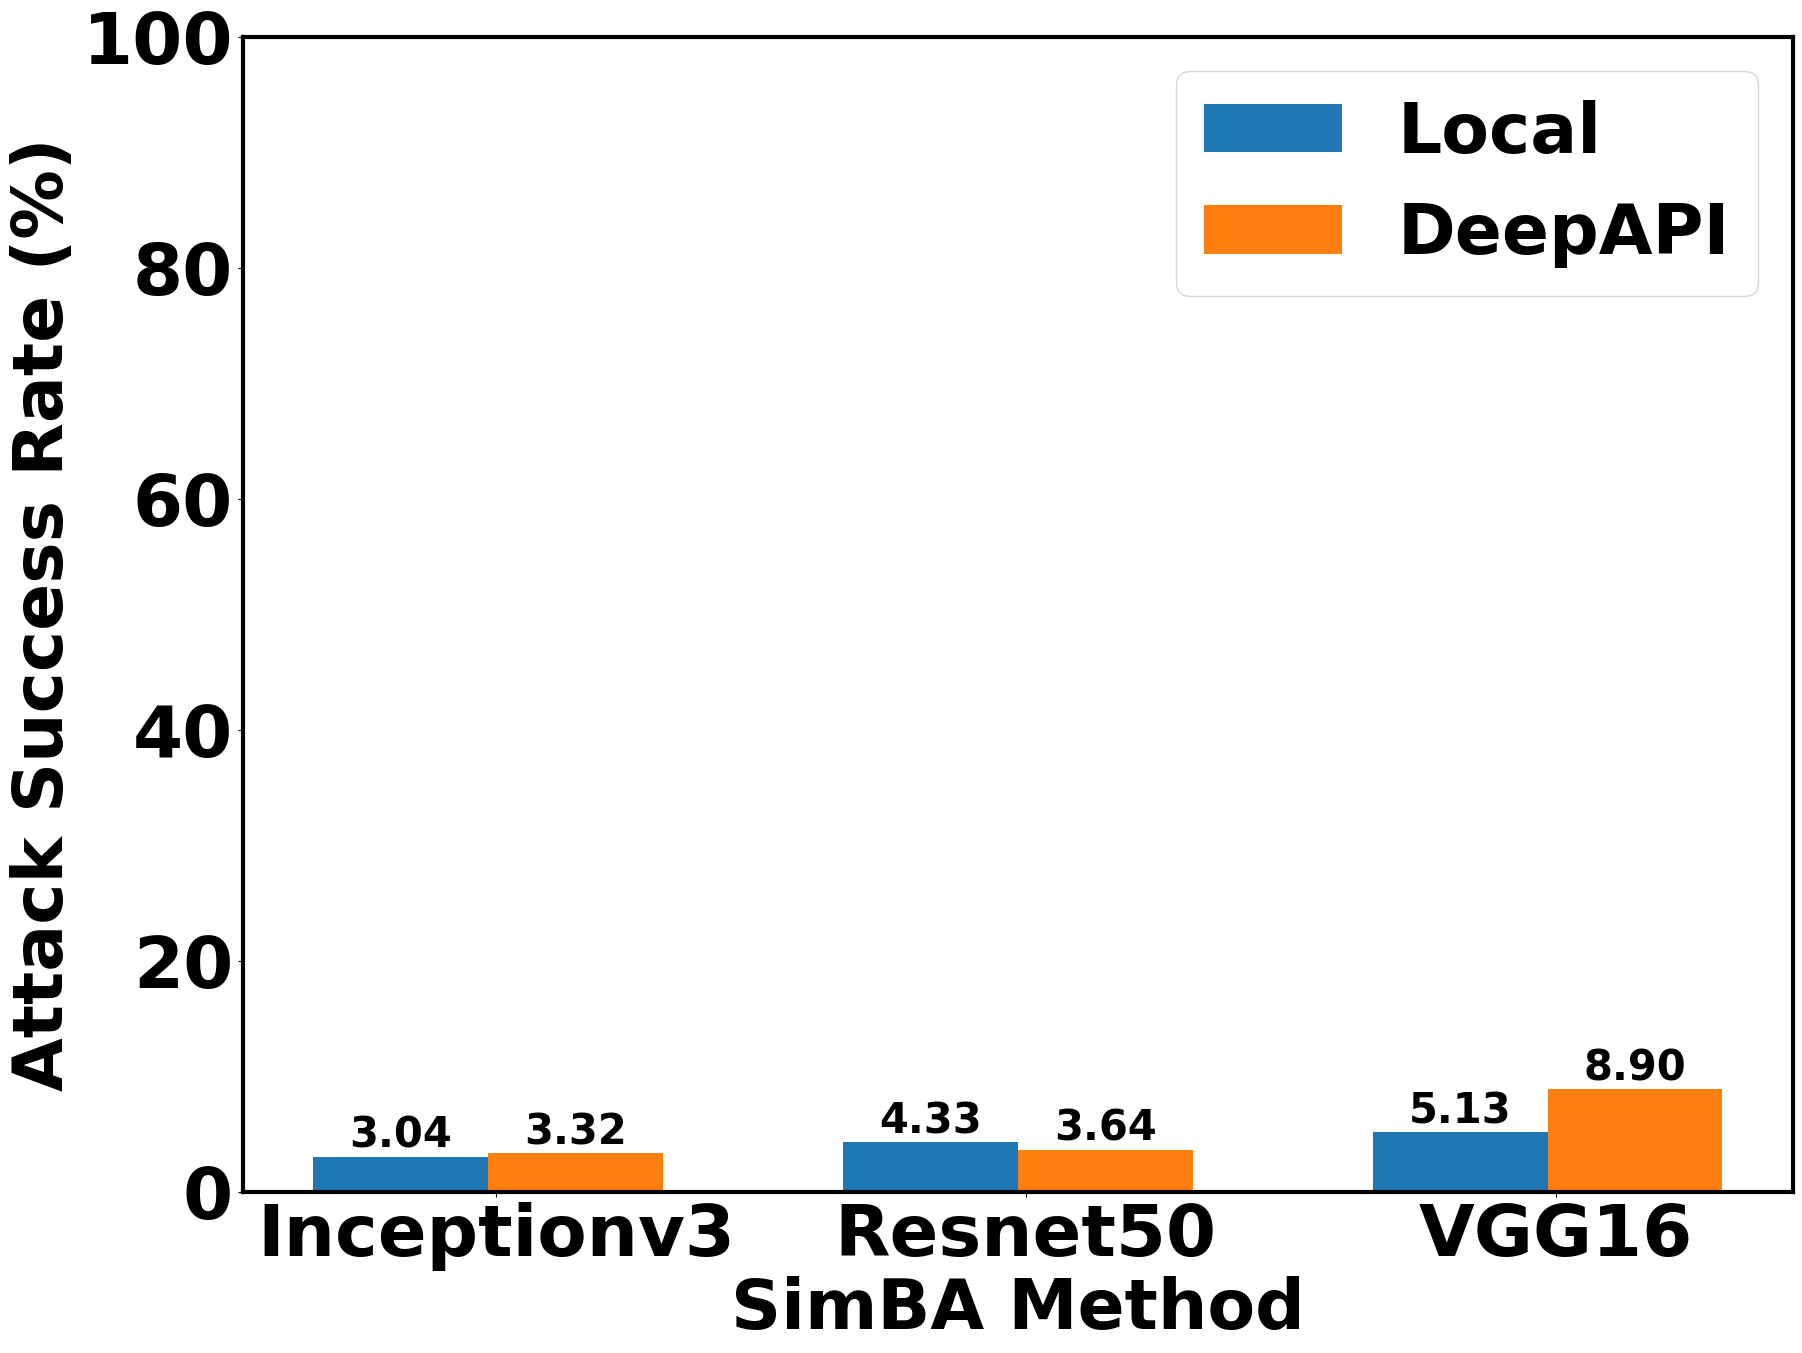

In [23]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('SimBA Method')
ax.set_ylabel('Attack Success Rate (%)')
 
# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = ax.bar(br1, [simba_keras_inceptionv3_success_rate, simba_keras_resnet50_success_rate, simba_keras_vgg16_success_rate],
        width = barWidth, label ='Local')

p2 = ax.bar(br2, [simba_deepapi_inceptionv3_success_rate, simba_deepapi_resnet50_success_rate, simba_deepapi_vgg16_success_rate],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 100])
ax.legend(loc="upper right", prop={'size': 50})
ax.margins(y=0.1)

plt.show()

In [24]:
fig.savefig("simba_attack_success_rate", bbox_inches='tight', pad_inches=0)

Number of Queries

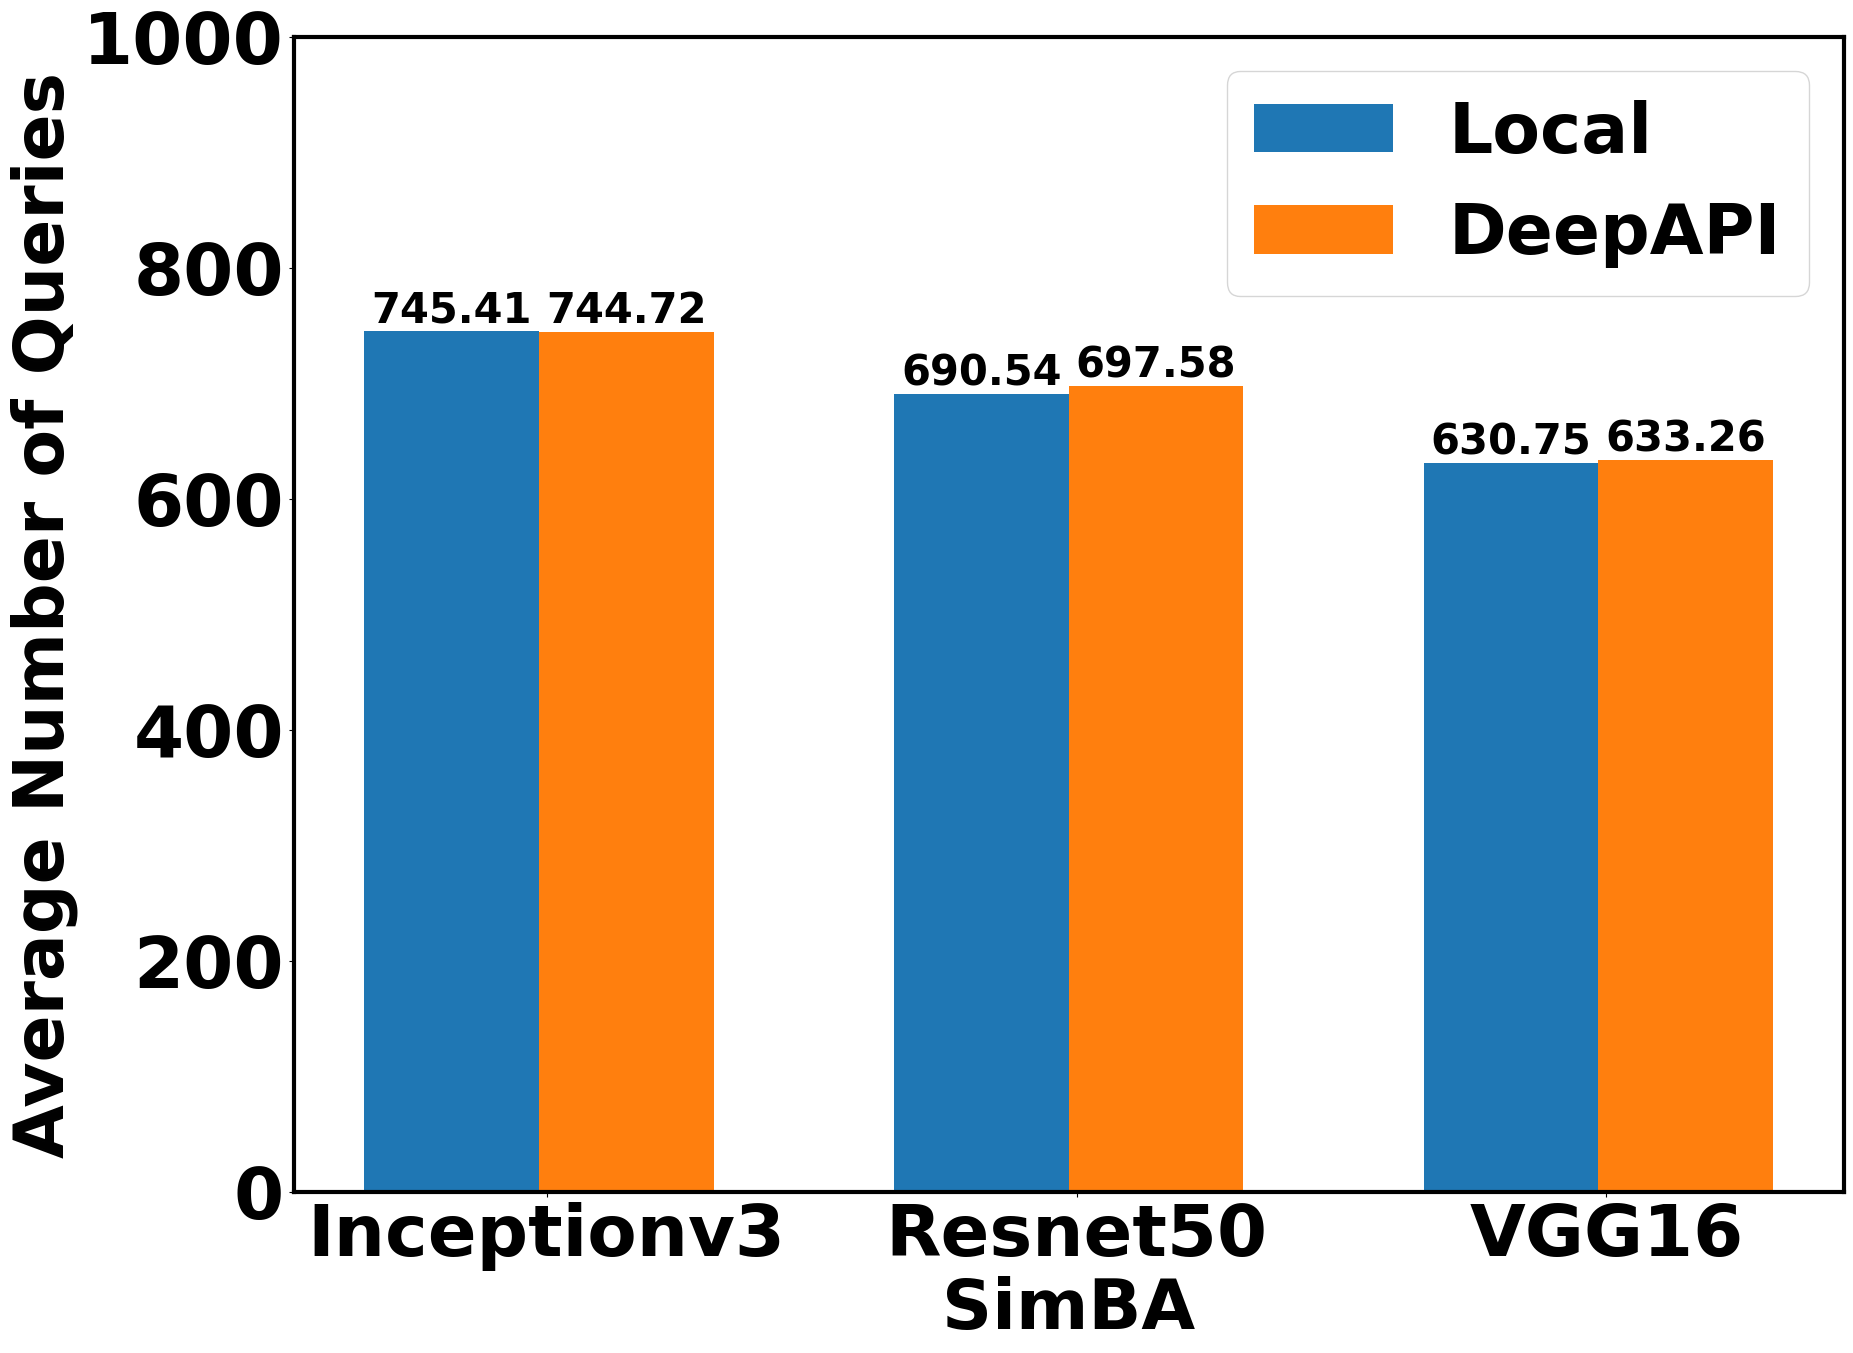

In [25]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('SimBA')
ax.set_ylabel('Average Number of Queries')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [simba_keras_inceptionv3_queries, simba_keras_resnet50_queries, simba_keras_vgg16_queries],
        width = barWidth, label ='Local')

p2 = plt.bar(br2, [simba_deepapi_inceptionv3_queries, simba_deepapi_resnet50_queries, simba_deepapi_vgg16_queries],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 1000])

ax.legend(loc="upper right", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [26]:
fig.savefig("simba_number_of_queries", bbox_inches='tight', pad_inches=0)

## 1.2 Bandits Attack

### Keras (Before pre-processing)

**Inceptionv3**

In [27]:
log_bandits_keras_inceptionv3_file

['logs-bandits/bandits/1000/keras/inceptionv3/20221019-153820\\events.out.tfevents.1666190300.pop-os.96116.5254.v2']

In [28]:
bandits_keras_inceptionv3_accuracy = get_tfb_data(log_bandits_keras_inceptionv3_file, 'Accuracy')
bandits_keras_inceptionv3_queries = get_tfb_data(log_bandits_keras_inceptionv3_file, 'Total Mean Number of Queries')

In [29]:
bandits_keras_inceptionv3_success_rate = 100 - np.array(bandits_keras_inceptionv3_accuracy).mean() * 100
bandits_keras_inceptionv3_queries = np.array(bandits_keras_inceptionv3_queries).mean()

**Resnet50**

In [30]:
bandits_keras_resnet50_accuracy = get_tfb_data(log_bandits_keras_resnet50_file, 'Accuracy')
bandits_keras_resnet50_queries = get_tfb_data(log_bandits_keras_resnet50_file, 'Total Mean Number of Queries')

In [31]:
bandits_keras_resnet50_success_rate = 100 - np.array(bandits_keras_resnet50_accuracy).mean() * 100
bandits_keras_resnet50_queries = np.array(bandits_keras_resnet50_queries).mean()

**VGG16**

In [32]:
bandits_keras_vgg16_accuracy = get_tfb_data(log_bandits_keras_vgg16_file, 'Accuracy') * 100
bandits_keras_vgg16_queries = get_tfb_data(log_bandits_keras_vgg16_file, 'Total Mean Number of Queries')

In [33]:
bandits_keras_vgg16_success_rate = 100 - np.array(bandits_keras_vgg16_accuracy).mean() * 100
bandits_keras_vgg16_queries = np.array(bandits_keras_vgg16_queries).mean()

### DeepAPI (After pre-processing)

**Inceptionv3**

In [34]:
bandits_deepapi_inceptionv3_accuracy = get_tfb_data(log_bandits_deepapi_inceptionv3_file, 'Accuracy')
bandits_deepapi_inceptionv3_queries = get_tfb_data(log_bandits_deepapi_inceptionv3_file, 'Total Mean Number of Queries')

In [35]:
bandits_deepapi_inceptionv3_success_rate = 100 - np.array(bandits_deepapi_inceptionv3_accuracy).mean() * 100
bandits_deepapi_inceptionv3_queries = np.array(bandits_deepapi_inceptionv3_queries).mean()

**Resnet50**

In [36]:
bandits_deepapi_resnet50_accuracy = get_tfb_data(log_bandits_deepapi_resnet50_file, 'Accuracy')
bandits_deepapi_resnet50_queries = get_tfb_data(log_bandits_deepapi_resnet50_file, 'Total Mean Number of Queries')

In [37]:
bandits_deepapi_resnet50_success_rate = 100 - np.array(bandits_deepapi_resnet50_accuracy).mean() * 100
bandits_deepapi_resnet50_queries = np.array(bandits_deepapi_resnet50_queries).mean()

**VGG16**

In [38]:
bandits_deepapi_vgg16_accuracy = get_tfb_data(log_bandits_deepapi_vgg16_file, 'Accuracy')
bandits_deepapi_vgg16_queries = get_tfb_data(log_bandits_deepapi_vgg16_file, 'Total Mean Number of Queries')

In [39]:
bandits_deepapi_vgg16_success_rate = 100 - np.array(bandits_deepapi_vgg16_accuracy).mean() * 100
bandits_deepapi_vgg16_queries = np.array(bandits_deepapi_vgg16_queries).mean()

### Plot

Attack Success Rate

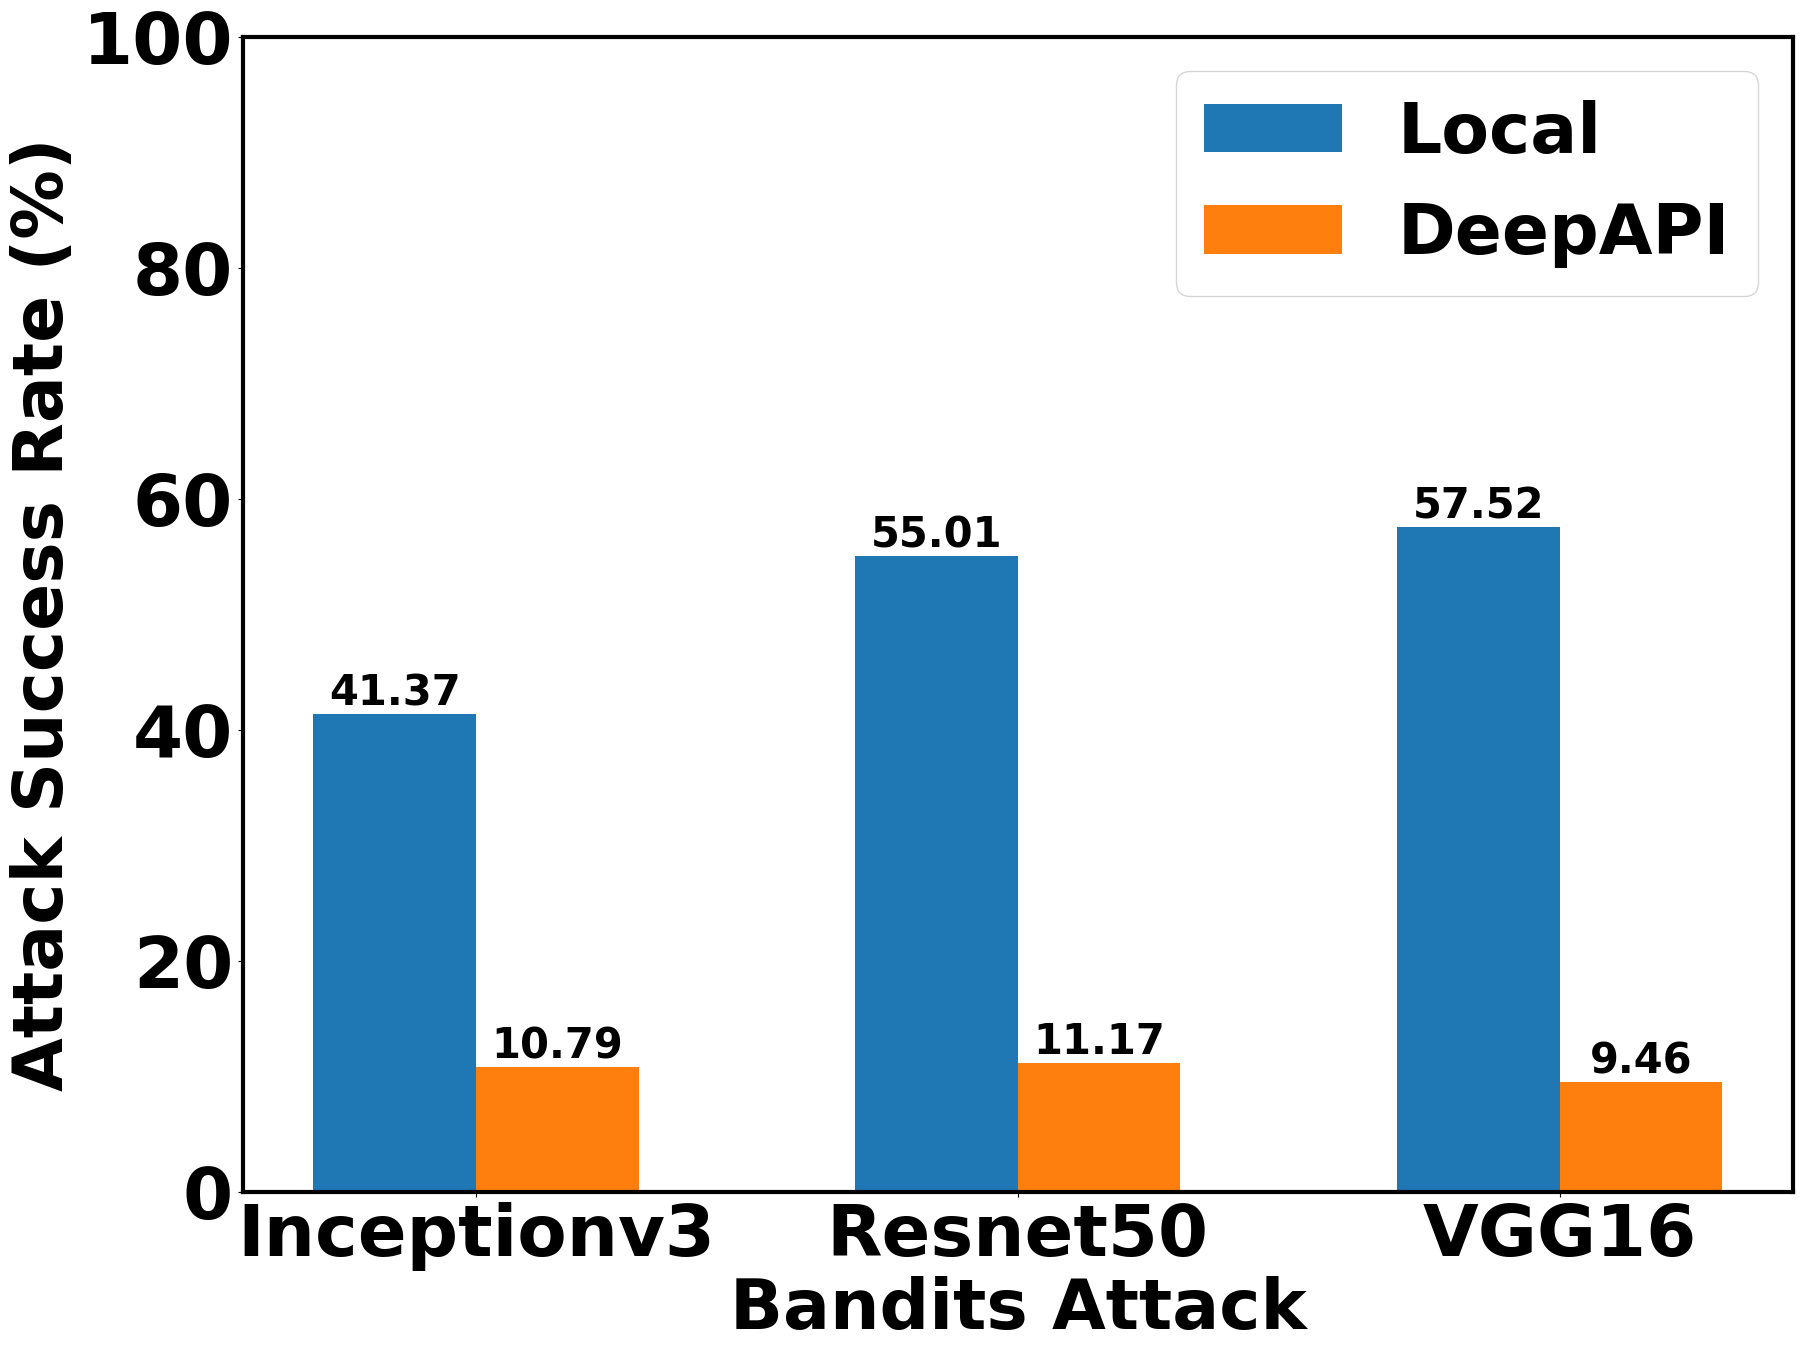

In [40]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Bandits Attack')
ax.set_ylabel('Attack Success Rate (%)')

# creating the bar plot
barWidth = 0.3
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = ax.bar(br1, [bandits_keras_inceptionv3_success_rate, bandits_keras_resnet50_success_rate, bandits_keras_vgg16_success_rate],
        width = barWidth, label ='Local')

p2 = ax.bar(br2, [bandits_deepapi_inceptionv3_success_rate, bandits_deepapi_resnet50_success_rate, bandits_deepapi_vgg16_success_rate],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 100])
ax.legend(loc="upper right", prop={'size': 50})
ax.margins(y=0.5)

plt.show()

In [41]:
fig.savefig("bandits_attack_success_rate", bbox_inches='tight', pad_inches=0)

Number of Queries

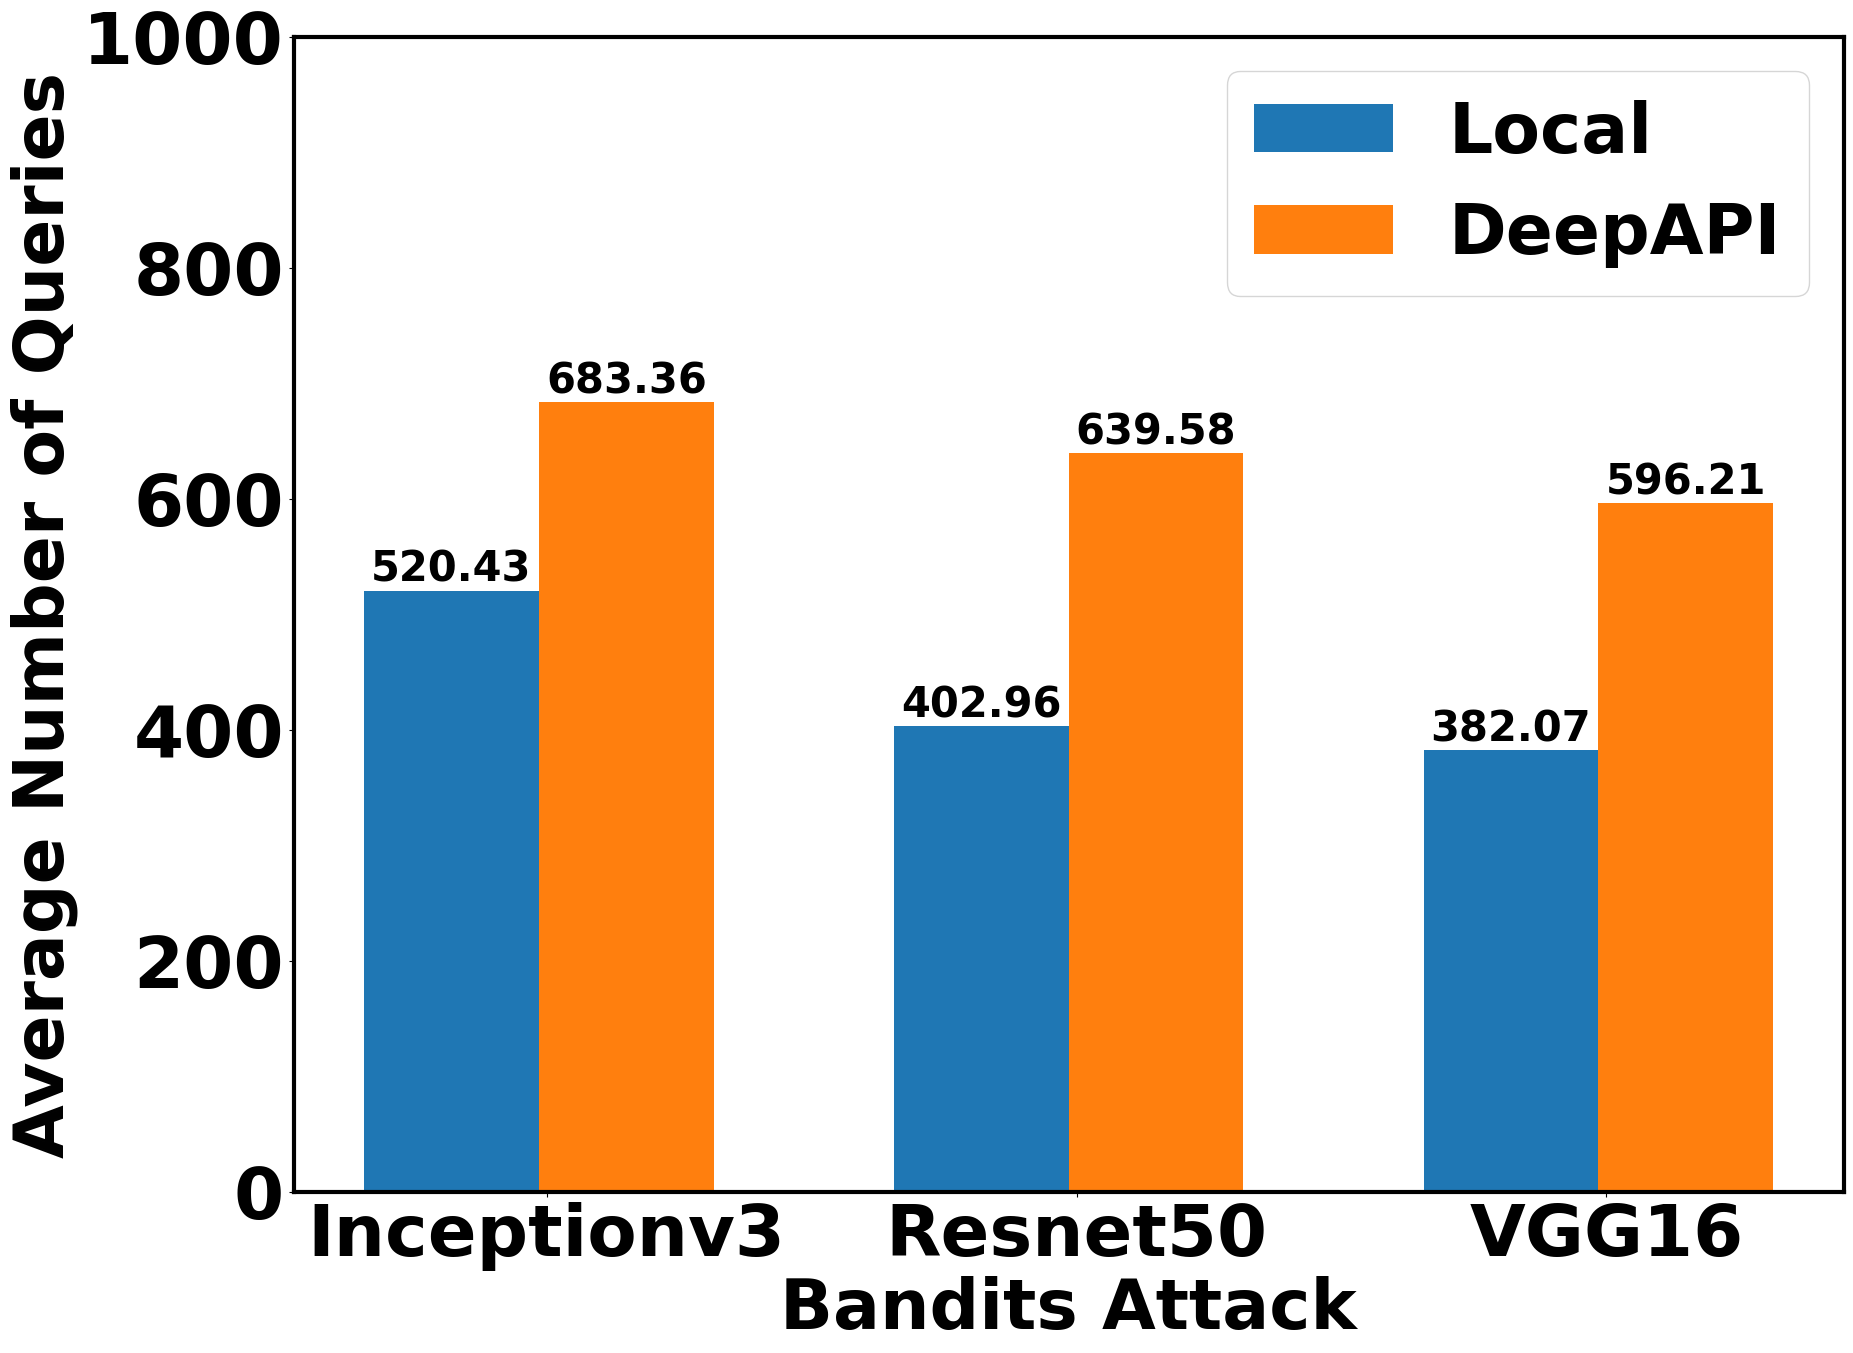

In [42]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Bandits Attack')
ax.set_ylabel('Average Number of Queries')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [bandits_keras_inceptionv3_queries, bandits_keras_resnet50_queries, bandits_keras_vgg16_queries],
        width = barWidth, label ='Local')

p2 = plt.bar(br2, [bandits_deepapi_inceptionv3_queries, bandits_deepapi_resnet50_queries, bandits_deepapi_vgg16_queries],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth  - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 1000])
ax.legend(loc="upper right", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [43]:
fig.savefig("bandits_number_of_queries", bbox_inches='tight', pad_inches=0)

## 1.3 Square Attack

### Keras (Before pre-processing)

**Inceptionv3**

In [44]:
square_keras_inceptionv3_accuracy = get_tfb_data(log_square_keras_inceptionv3_file, 'Accuracy')
square_keras_inceptionv3_queries = get_tfb_data(log_square_keras_inceptionv3_file, 'Total Mean Number of Queries')

In [45]:
square_keras_inceptionv3_success_rate = 100 - np.array(square_keras_inceptionv3_accuracy).mean() * 100
square_keras_inceptionv3_queries = np.array(square_keras_inceptionv3_queries).mean()

**Resnet50**

In [46]:
square_keras_resnet50_accuracy = get_tfb_data(log_square_keras_resnet50_file, 'Accuracy')
square_keras_resnet50_queries = get_tfb_data(log_square_keras_resnet50_file, 'Total Mean Number of Queries')

In [47]:
square_keras_resnet50_success_rate = 100 - np.array(square_keras_resnet50_accuracy).mean() * 100
square_keras_resnet50_queries = np.array(square_keras_resnet50_queries).mean()

**VGG16**

In [48]:
square_keras_vgg16_accuracy = get_tfb_data(log_square_keras_vgg16_file, 'Accuracy') * 100
square_keras_vgg16_queries = get_tfb_data(log_square_keras_vgg16_file, 'Total Mean Number of Queries')

In [49]:
square_keras_vgg16_success_rate = 100 - np.array(square_keras_vgg16_accuracy).mean() * 100
square_keras_vgg16_queries = np.array(square_keras_vgg16_queries).mean()

### DeepAPI (After pre-processing)

**Inceptionv3**

In [50]:
square_deepapi_inceptionv3_accuracy = get_tfb_data(log_square_deepapi_inceptionv3_file, 'Accuracy')
square_deepapi_inceptionv3_queries = get_tfb_data(log_square_deepapi_inceptionv3_file, 'Total Mean Number of Queries')

In [51]:
square_deepapi_inceptionv3_success_rate = 100 - np.array(square_deepapi_inceptionv3_accuracy).mean() * 100
square_deepapi_inceptionv3_queries = np.array(square_deepapi_inceptionv3_queries).mean()

**Resnet50**

In [52]:
square_deepapi_resnet50_accuracy = get_tfb_data(log_square_deepapi_resnet50_file, 'Accuracy')
square_deepapi_resnet50_queries = get_tfb_data(log_square_deepapi_resnet50_file, 'Total Mean Number of Queries')

In [53]:
square_deepapi_resnet50_success_rate = 100 - np.array(square_deepapi_resnet50_accuracy).mean() * 100
square_deepapi_resnet50_queries = np.array(square_deepapi_resnet50_queries).mean()

**VGG16**

In [54]:
square_deepapi_vgg16_accuracy = get_tfb_data(log_square_deepapi_vgg16_file, 'Accuracy')
square_deepapi_vgg16_queries = get_tfb_data(log_square_deepapi_vgg16_file, 'Total Mean Number of Queries')

In [55]:
square_deepapi_vgg16_success_rate = 100 - np.array(square_deepapi_vgg16_accuracy).mean() * 100
square_deepapi_vgg16_queries = np.array(square_deepapi_vgg16_queries).mean()

### Plot

Attack Success Rate

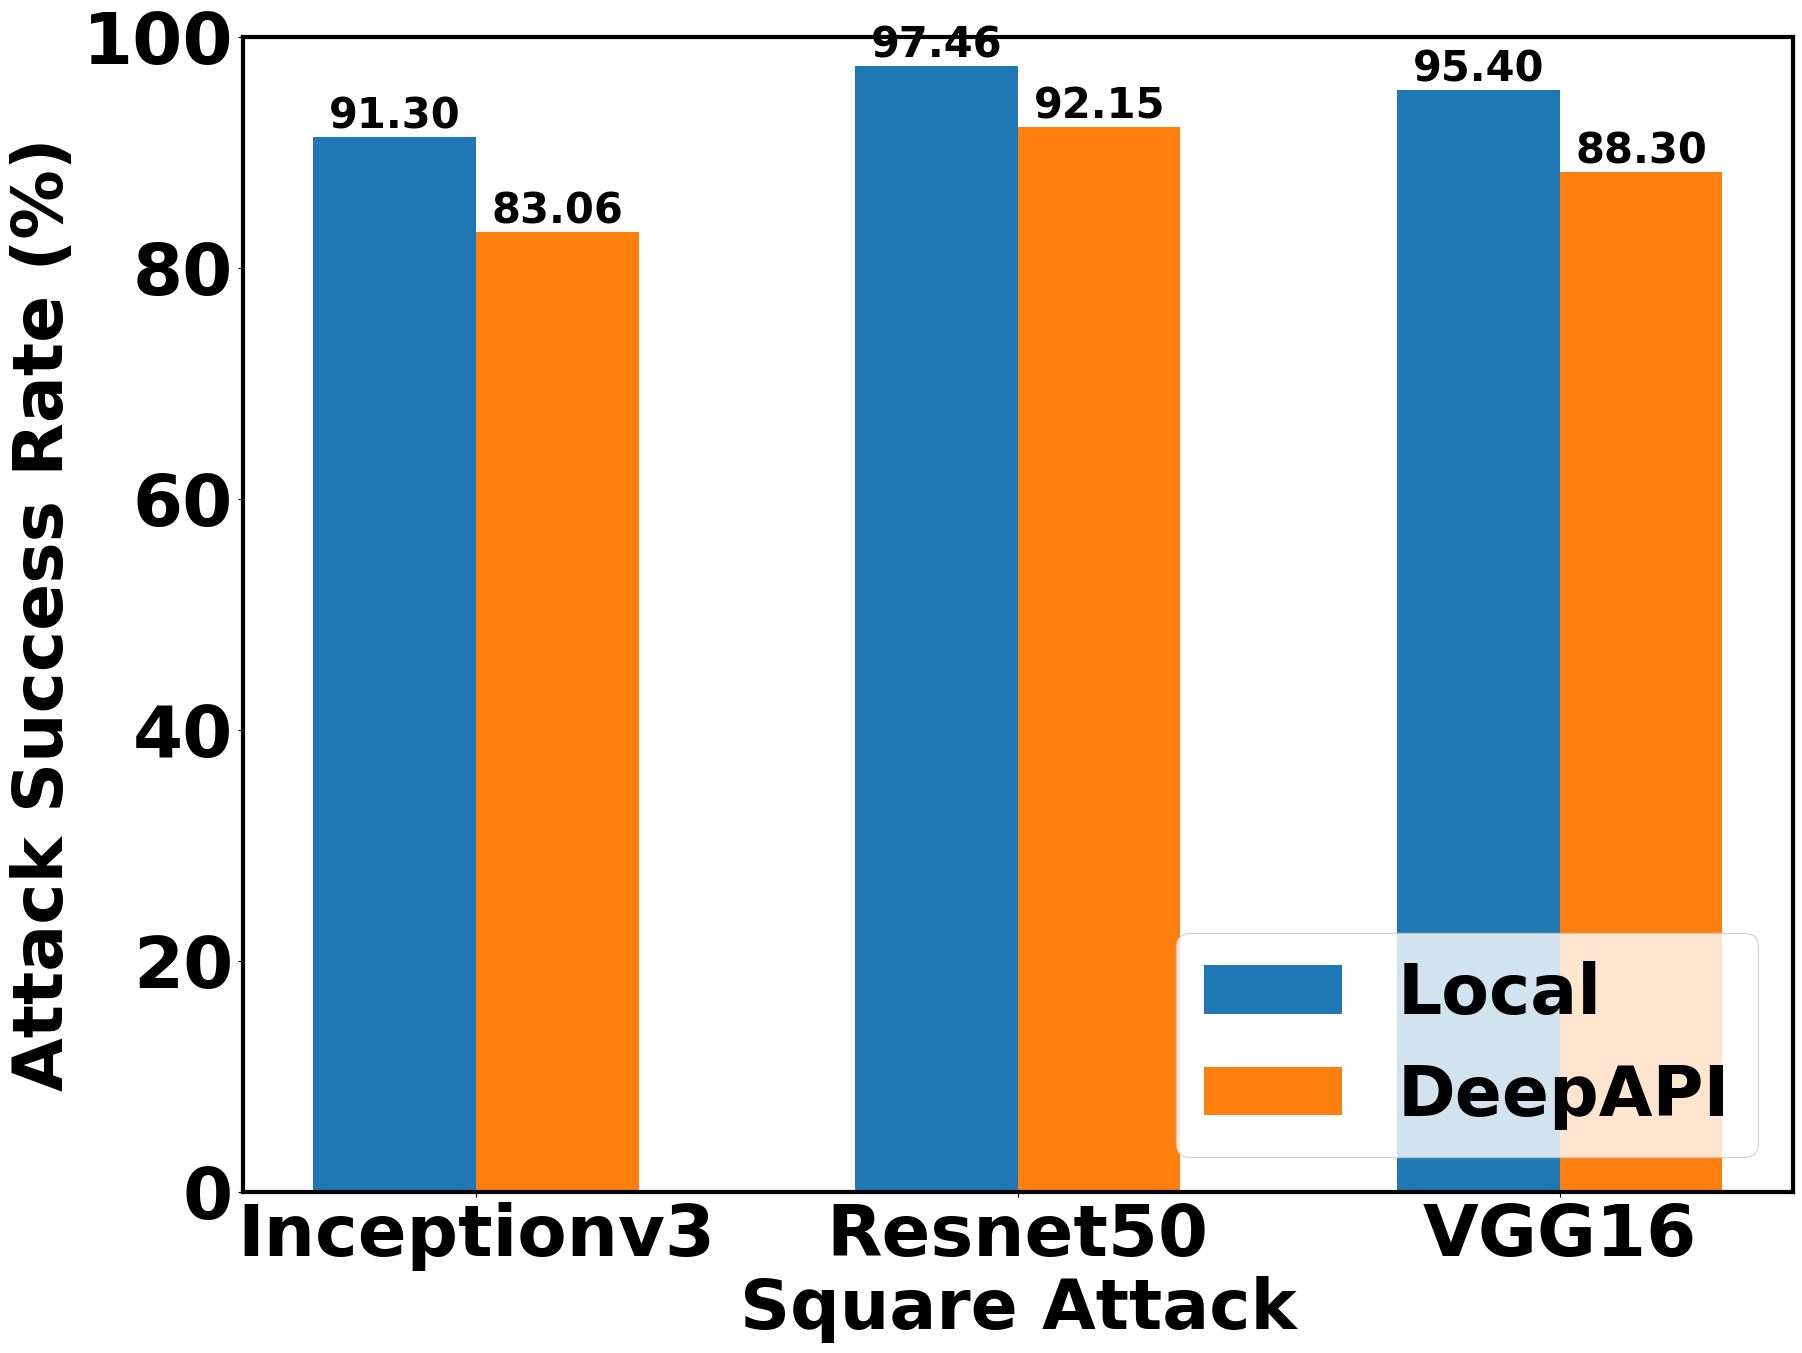

In [56]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Square Attack')
ax.set_ylabel('Attack Success Rate (%)')

# creating the bar plot
barWidth = 0.3
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = ax.bar(br1, [square_keras_inceptionv3_success_rate, square_keras_resnet50_success_rate, square_keras_vgg16_success_rate],
        width = barWidth, label ='Local')

p2 = ax.bar(br2, [square_deepapi_inceptionv3_success_rate, square_deepapi_resnet50_success_rate, square_deepapi_vgg16_success_rate],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 100])

ax.legend(loc="lower right", prop={'size': 50})
ax.margins(y=1.5)

plt.show()

In [57]:
fig.savefig("square_attack_success_rate", bbox_inches='tight', pad_inches=0)

Number of Queries

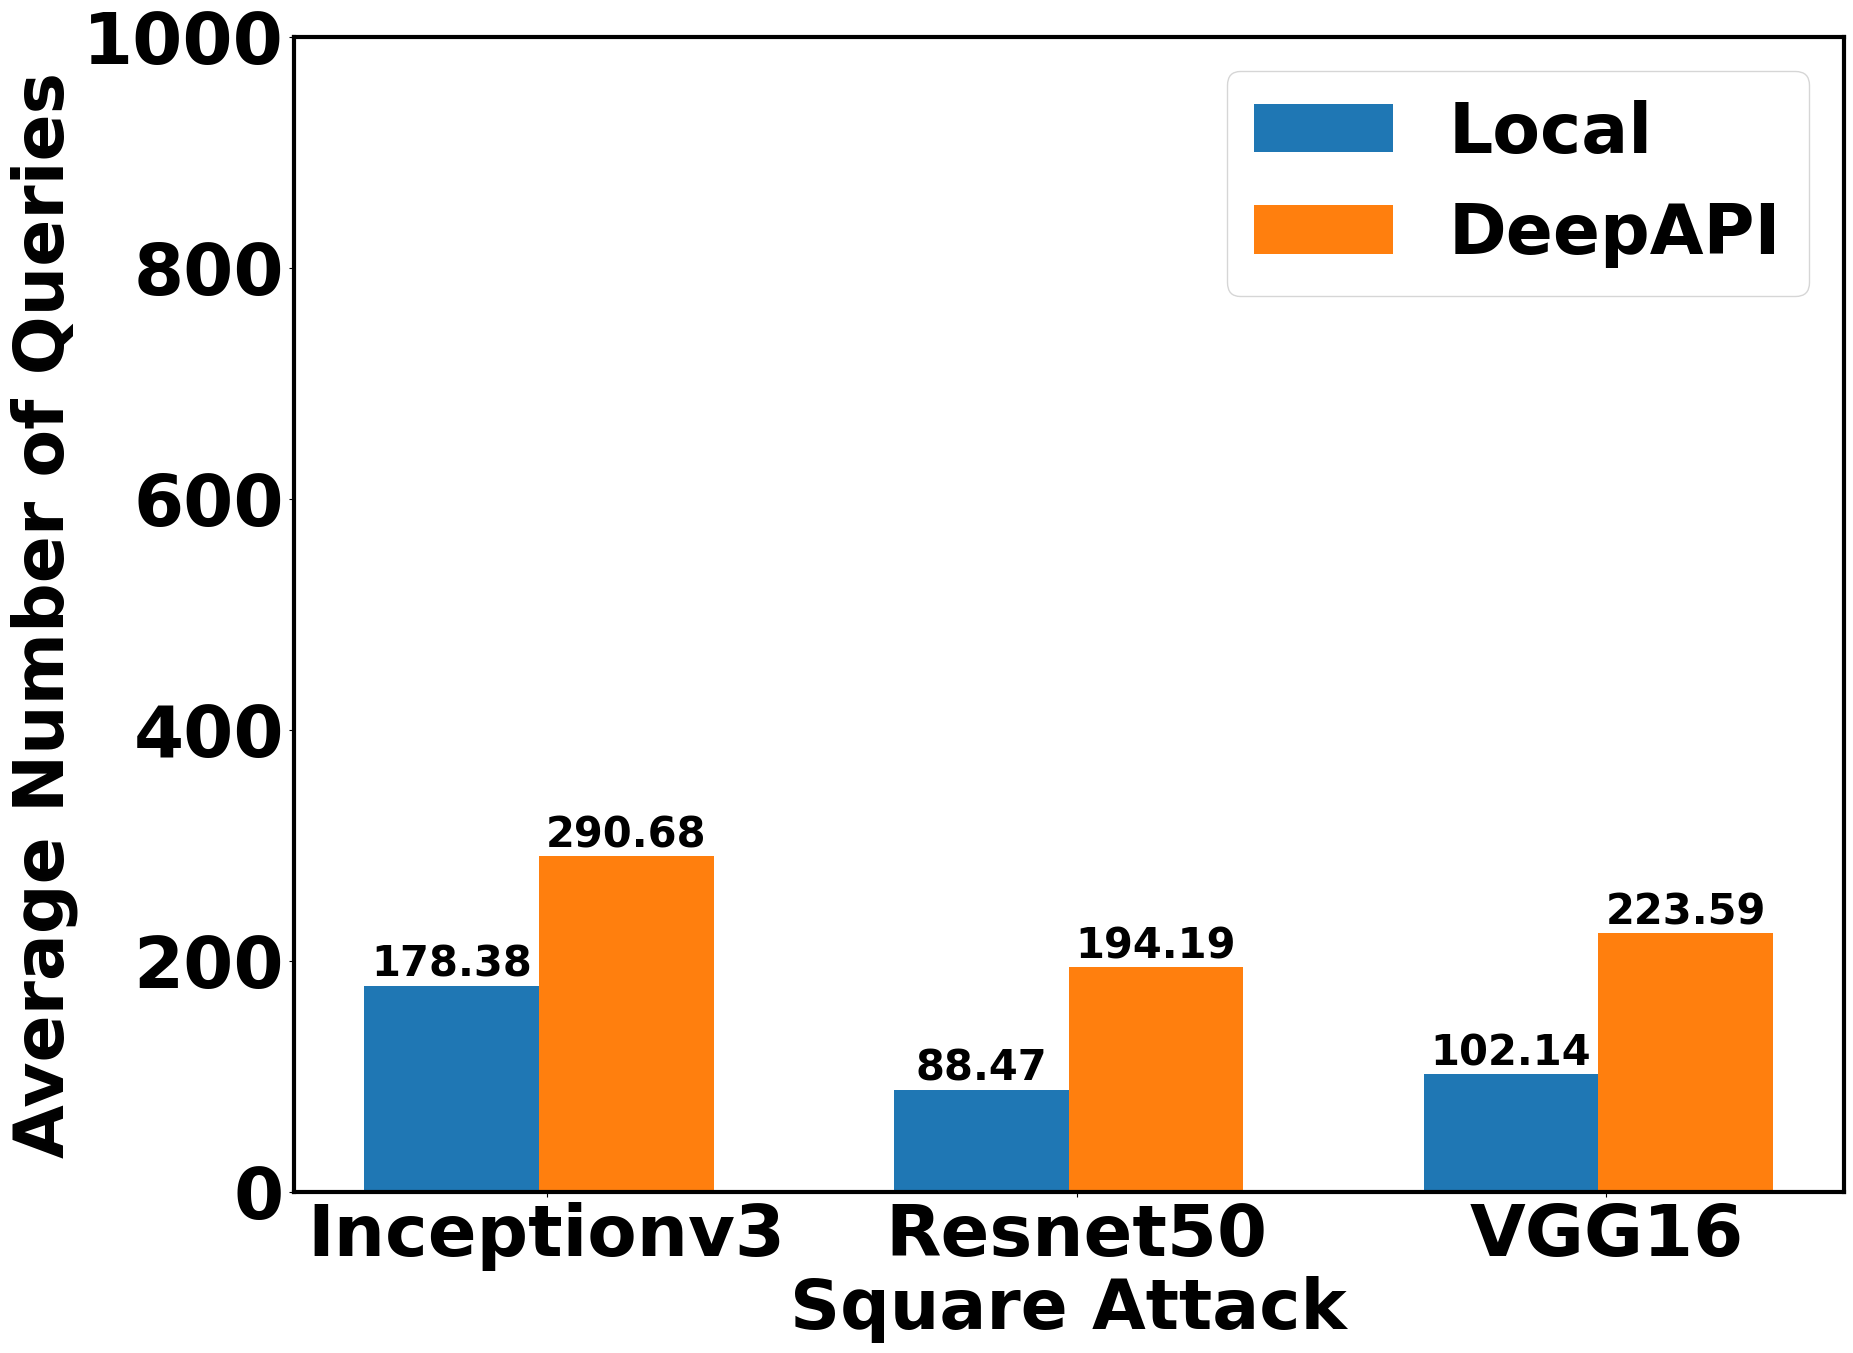

In [58]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Square Attack')
ax.set_ylabel('Average Number of Queries')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [square_keras_inceptionv3_queries, square_keras_resnet50_queries, square_keras_vgg16_queries],
        width = barWidth, label ='Local')

p2 = plt.bar(br2, [square_deepapi_inceptionv3_queries, square_deepapi_resnet50_queries, square_deepapi_vgg16_queries],
        width = barWidth, label ='DeepAPI')

plt.xticks([r + barWidth  - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 1000])
ax.legend(loc="upper right", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [59]:
fig.savefig("square_number_of_queries", bbox_inches='tight', pad_inches=0)

# 2. Horizontal Distribution

In [60]:
def get_tfb_time(files, tag):
    data = []
    for file in files:
        reader = SummaryReader(file, extra_columns={'wall_time'})
        data.append(reader.tensors[reader.tensors['tag']== tag]['wall_time'].iloc[-1] - reader.tensors[reader.tensors['tag']== tag]['wall_time'].iloc[0])
    return data

In [61]:
log_simba_deepapi_inceptionv3_horizon_file = get_tfb_file('logs-simba/simba/100/deepapi/horizontal/inceptionv3/')
log_simba_deepapi_resnet50_horizon_file = get_tfb_file('logs-simba/simba/100/deepapi/horizontal/resnet50/')
log_simba_deepapi_vgg16_horizon_file = get_tfb_file('logs-simba/simba/100/deepapi/horizontal/vgg16/')

log_simba_deepapi_inceptionv3_none_file = get_tfb_file('logs-simba/simba/100/deepapi/none/inceptionv3/')
log_simba_deepapi_resnet50_none_file = get_tfb_file('logs-simba/simba/100/deepapi/none/resnet50/')
log_simba_deepapi_vgg16_none_file = get_tfb_file('logs-simba/simba/100/deepapi/none/vgg16/')

In [62]:
log_bandits_deepapi_inceptionv3_horizon_file = get_tfb_file('logs-bandits/bandits/100/deepapi/horizontal/inceptionv3/')
log_bandits_deepapi_resnet50_horizon_file = get_tfb_file('logs-bandits/bandits/100/deepapi/horizontal/resnet50/')
log_bandits_deepapi_vgg16_horizon_file = get_tfb_file('logs-bandits/bandits/100/deepapi/horizontal/vgg16/')

log_bandits_deepapi_inceptionv3_none_file = get_tfb_file('logs-bandits/bandits/100/deepapi/none/inceptionv3/')
log_bandits_deepapi_resnet50_none_file = get_tfb_file('logs-bandits/bandits/100/deepapi/none/resnet50/')
log_bandits_deepapi_vgg16_none_file = get_tfb_file('logs-bandits/bandits/100/deepapi/none/vgg16/')

In [63]:
log_square_deepapi_inceptionv3_horizon_file = get_tfb_file('logs-square/square/100/deepapi/horizontal/inceptionv3/')
log_square_deepapi_resnet50_horizon_file = get_tfb_file('logs-square/square/100/deepapi/horizontal/resnet50/')
log_square_deepapi_vgg16_horizon_file = get_tfb_file('logs-square/square/100/deepapi/horizontal/vgg16/')

log_square_deepapi_inceptionv3_none_file = get_tfb_file('logs-square/square/100/deepapi/none/inceptionv3/')
log_square_deepapi_resnet50_none_file = get_tfb_file('logs-square/square/100/deepapi/none/resnet50/')
log_square_deepapi_vgg16_none_file = get_tfb_file('logs-square/square/100/deepapi/none/vgg16/')

## 2.1 SimBA

**Inceptionv3**

In [64]:
simba_deepapi_inceptionv3_none_accuracy = get_tfb_data(log_simba_deepapi_inceptionv3_none_file, 'Accuracy')
simba_deepapi_inceptionv3_none_queries = get_tfb_data(log_simba_deepapi_inceptionv3_none_file, 'Total Mean Number of Queries')
simba_deepapi_inceptionv3_none_time = get_tfb_time(log_simba_deepapi_inceptionv3_none_file, 'Accuracy')

simba_deepapi_inceptionv3_none_success_rate = 100 - np.array(simba_deepapi_inceptionv3_none_accuracy).mean() * 100
simba_deepapi_inceptionv3_none_queries = np.array(simba_deepapi_inceptionv3_none_queries).mean()
simba_deepapi_inceptionv3_none_time = np.array(simba_deepapi_inceptionv3_none_time).mean() / 60

In [65]:
simba_deepapi_inceptionv3_none_success_rate, simba_deepapi_inceptionv3_none_queries, simba_deepapi_inceptionv3_none_time

(2.5641024112701416, 775.0999755859375, 662.4731877009074)

In [66]:
simba_deepapi_inceptionv3_horizon_accuracy = get_tfb_data(log_simba_deepapi_inceptionv3_horizon_file, 'Accuracy')
simba_deepapi_inceptionv3_horizon_queries = get_tfb_data(log_simba_deepapi_inceptionv3_horizon_file, 'Total Mean Number of Queries')
simba_deepapi_inceptionv3_horizon_time = get_tfb_time(log_simba_deepapi_inceptionv3_horizon_file, 'Accuracy')

simba_deepapi_inceptionv3_horizon_success_rate = 100 - np.array(simba_deepapi_inceptionv3_horizon_accuracy).mean() * 100
simba_deepapi_inceptionv3_horizon_queries = np.array(simba_deepapi_inceptionv3_horizon_queries).mean()
simba_deepapi_inceptionv3_horizon_time = np.array(simba_deepapi_inceptionv3_horizon_time).mean() / 60

In [67]:
simba_deepapi_inceptionv3_horizon_success_rate, simba_deepapi_inceptionv3_horizon_queries, simba_deepapi_inceptionv3_horizon_time

(2.5641024112701416, 772.5, 148.19546399911243)

**Resnet50**

In [68]:
simba_deepapi_resnet50_none_accuracy = get_tfb_data(log_simba_deepapi_resnet50_none_file, 'Accuracy')
simba_deepapi_resnet50_none_queries = get_tfb_data(log_simba_deepapi_resnet50_none_file, 'Total Mean Number of Queries')
simba_deepapi_resnet50_none_time = get_tfb_time(log_simba_deepapi_resnet50_none_file, 'Accuracy')

simba_deepapi_resnet50_none_success_rate = 100 - np.array(simba_deepapi_resnet50_none_accuracy).mean() * 100
simba_deepapi_resnet50_none_queries = np.array(simba_deepapi_resnet50_none_queries).mean()
simba_deepapi_resnet50_none_time = np.array(simba_deepapi_resnet50_none_time).mean() / 60

In [69]:
simba_deepapi_resnet50_none_success_rate, simba_deepapi_resnet50_none_queries, simba_deepapi_resnet50_none_time

(4.000002145767212, 739.5800170898438, 637.5794864495596)

In [70]:
simba_deepapi_resnet50_horizon_accuracy = get_tfb_data(log_simba_deepapi_resnet50_horizon_file, 'Accuracy')
simba_deepapi_resnet50_horizon_queries = get_tfb_data(log_simba_deepapi_resnet50_horizon_file, 'Total Mean Number of Queries')
simba_deepapi_resnet50_horizon_time = get_tfb_time(log_simba_deepapi_resnet50_horizon_file, 'Accuracy')

simba_deepapi_resnet50_horizon_success_rate = 100 - np.array(simba_deepapi_resnet50_horizon_accuracy).mean() * 100
simba_deepapi_resnet50_horizon_queries = np.array(simba_deepapi_resnet50_horizon_queries).mean()
simba_deepapi_resnet50_horizon_time = np.array(simba_deepapi_resnet50_horizon_time).mean() / 60

In [71]:
simba_deepapi_resnet50_horizon_success_rate, simba_deepapi_resnet50_horizon_queries, simba_deepapi_resnet50_horizon_time

(2.6666641235351562, 738.780029296875, 133.01597608327864)

**VGG16**

In [72]:
simba_deepapi_vgg16_none_accuracy = get_tfb_data(log_simba_deepapi_vgg16_none_file, 'Accuracy')
simba_deepapi_vgg16_none_queries = get_tfb_data(log_simba_deepapi_vgg16_none_file, 'Total Mean Number of Queries')
simba_deepapi_vgg16_none_time = get_tfb_time(log_simba_deepapi_vgg16_none_file, 'Accuracy')

simba_deepapi_vgg16_none_success_rate = 100 - np.array(simba_deepapi_vgg16_none_accuracy).mean() * 100
simba_deepapi_vgg16_none_queries = np.array(simba_deepapi_vgg16_none_queries).mean()
simba_deepapi_vgg16_none_time = np.array(simba_deepapi_vgg16_none_time).mean() / 60

In [73]:
simba_deepapi_vgg16_none_success_rate, simba_deepapi_vgg16_none_queries, simba_deepapi_vgg16_none_time

(2.7027010917663574, 729.6799926757812, 1313.6709578315417)

In [74]:
simba_deepapi_vgg16_horizon_accuracy = get_tfb_data(log_simba_deepapi_vgg16_horizon_file, 'Accuracy')
simba_deepapi_vgg16_horizon_queries = get_tfb_data(log_simba_deepapi_vgg16_horizon_file, 'Total Mean Number of Queries')
simba_deepapi_vgg16_horizon_time = get_tfb_time(log_simba_deepapi_vgg16_horizon_file, 'Accuracy')

simba_deepapi_vgg16_horizon_success_rate = 100 - np.array(simba_deepapi_vgg16_horizon_accuracy).mean() * 100
simba_deepapi_vgg16_horizon_queries = np.array(simba_deepapi_vgg16_horizon_queries).mean()
simba_deepapi_vgg16_horizon_time = np.array(simba_deepapi_vgg16_horizon_time).mean() / 60

In [75]:
simba_deepapi_vgg16_horizon_success_rate, simba_deepapi_vgg16_horizon_queries, simba_deepapi_vgg16_horizon_time

(2.7027010917663574, 727.739990234375, 225.51787781715393)

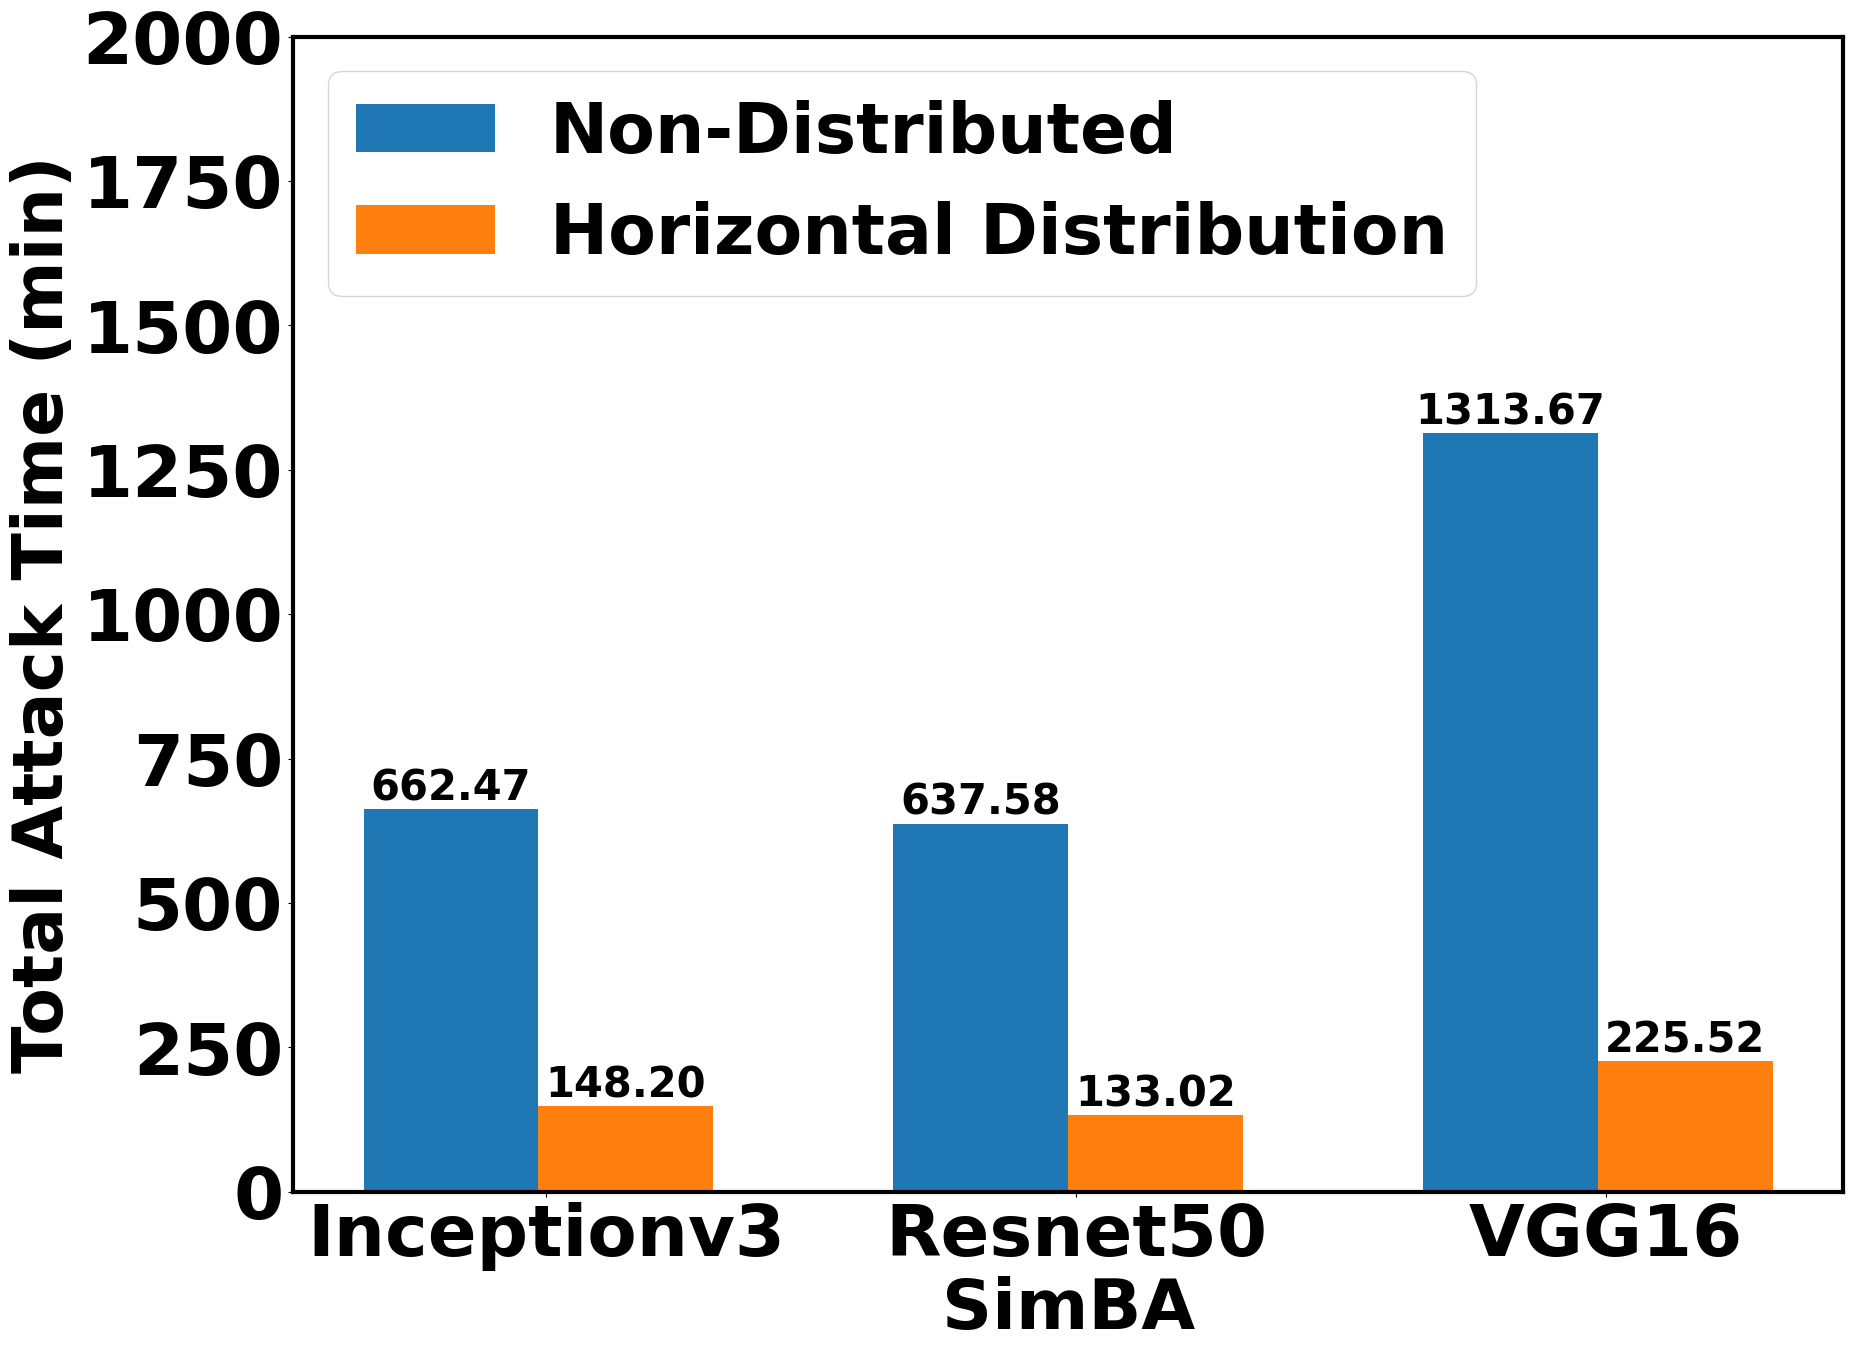

In [76]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('SimBA')
ax.set_ylabel('Total Attack Time (min)')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [simba_deepapi_inceptionv3_none_time, simba_deepapi_resnet50_none_time, simba_deepapi_vgg16_none_time],
        width = barWidth, label ='Non-Distributed')

p2 = plt.bar(br2, [simba_deepapi_inceptionv3_horizon_time, simba_deepapi_resnet50_horizon_time, simba_deepapi_vgg16_horizon_time],
        width = barWidth, label ='Horizontal Distribution')

plt.xticks([r + barWidth  - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 2000])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [77]:
fig.savefig("simba_attack_horizontal_time", bbox_inches='tight', pad_inches=0)

## 2.2 Sqare Attack

**Inceptionv3**

In [78]:
square_deepapi_inceptionv3_none_accuracy = get_tfb_data(log_square_deepapi_inceptionv3_none_file, 'Accuracy')
square_deepapi_inceptionv3_none_queries = get_tfb_data(log_square_deepapi_inceptionv3_none_file, 'Total Mean Number of Queries')
square_deepapi_inceptionv3_none_time = get_tfb_time(log_square_deepapi_inceptionv3_none_file, 'Accuracy')

square_deepapi_inceptionv3_none_success_rate = 100 - np.array(square_deepapi_inceptionv3_none_accuracy).mean() * 100
square_deepapi_inceptionv3_none_queries = np.array(square_deepapi_inceptionv3_none_queries).mean()
square_deepapi_inceptionv3_none_time = np.array(square_deepapi_inceptionv3_none_time).mean() / 60

In [79]:
square_deepapi_inceptionv3_none_success_rate, square_deepapi_inceptionv3_none_queries, square_deepapi_inceptionv3_none_time

(78.20512801408768, 359.8205261230469, 299.79171824852625)

In [80]:
square_deepapi_inceptionv3_horizon_accuracy = get_tfb_data(log_square_deepapi_inceptionv3_horizon_file, 'Accuracy')
square_deepapi_inceptionv3_horizon_queries = get_tfb_data(log_square_deepapi_inceptionv3_horizon_file, 'Total Mean Number of Queries')
square_deepapi_inceptionv3_horizon_time = get_tfb_time(log_square_deepapi_inceptionv3_horizon_file, 'Accuracy')

square_deepapi_inceptionv3_horizon_success_rate = 100 - np.array(square_deepapi_inceptionv3_horizon_accuracy).mean() * 100
square_deepapi_inceptionv3_horizon_queries = np.array(square_deepapi_inceptionv3_horizon_queries).mean()
square_deepapi_inceptionv3_horizon_time = np.array(square_deepapi_inceptionv3_horizon_time).mean() / 60

In [81]:
square_deepapi_inceptionv3_horizon_success_rate, square_deepapi_inceptionv3_horizon_queries, square_deepapi_inceptionv3_horizon_time

(78.20512801408768, 359.8205261230469, 48.13758419752121)

**Resnet50**

In [82]:
square_deepapi_resnet50_none_accuracy = get_tfb_data(log_square_deepapi_resnet50_none_file, 'Accuracy')
square_deepapi_resnet50_none_queries = get_tfb_data(log_square_deepapi_resnet50_none_file, 'Total Mean Number of Queries')
square_deepapi_resnet50_none_time = get_tfb_time(log_square_deepapi_resnet50_none_file, 'Accuracy')

square_deepapi_resnet50_none_success_rate = 100 - np.array(square_deepapi_resnet50_none_accuracy).mean() * 100
square_deepapi_resnet50_none_queries = np.array(square_deepapi_resnet50_none_queries).mean()
square_deepapi_resnet50_none_time = np.array(square_deepapi_resnet50_none_time).mean() / 60

In [83]:
square_deepapi_resnet50_none_success_rate, square_deepapi_resnet50_none_queries, square_deepapi_resnet50_none_time

(93.33333298563957, 200.1999969482422, 80.5157075325648)

In [84]:
square_deepapi_resnet50_horizon_accuracy = get_tfb_data(log_square_deepapi_resnet50_horizon_file, 'Accuracy')
square_deepapi_resnet50_horizon_queries = get_tfb_data(log_square_deepapi_resnet50_horizon_file, 'Total Mean Number of Queries')
square_deepapi_resnet50_horizon_time = get_tfb_time(log_square_deepapi_resnet50_horizon_file, 'Accuracy')

square_deepapi_resnet50_horizon_success_rate = 100 - np.array(square_deepapi_resnet50_horizon_accuracy).mean() * 100
square_deepapi_resnet50_horizon_queries = np.array(square_deepapi_resnet50_horizon_queries).mean()
square_deepapi_resnet50_horizon_time = np.array(square_deepapi_resnet50_horizon_time).mean() / 60

In [85]:
square_deepapi_resnet50_horizon_success_rate, square_deepapi_resnet50_horizon_queries, square_deepapi_resnet50_horizon_time

(93.33333298563957, 204.77333068847656, 24.3970636844635)

**VGG16**

In [86]:
square_deepapi_vgg16_none_accuracy = get_tfb_data(log_square_deepapi_vgg16_none_file, 'Accuracy')
square_deepapi_vgg16_none_queries = get_tfb_data(log_square_deepapi_vgg16_none_file, 'Total Mean Number of Queries')
square_deepapi_vgg16_none_time = get_tfb_time(log_square_deepapi_vgg16_none_file, 'Accuracy')

square_deepapi_vgg16_none_success_rate = 100 - np.array(square_deepapi_vgg16_none_accuracy).mean() * 100
square_deepapi_vgg16_none_queries = np.array(square_deepapi_vgg16_none_queries).mean()
square_deepapi_vgg16_none_time = np.array(square_deepapi_vgg16_none_time).mean() / 60

In [87]:
square_deepapi_vgg16_none_success_rate, square_deepapi_vgg16_none_queries, square_deepapi_vgg16_none_time

(91.89189225435257, 227.6216278076172, 173.48357461690904)

In [88]:
square_deepapi_vgg16_horizon_accuracy = get_tfb_data(log_square_deepapi_vgg16_horizon_file, 'Accuracy')
square_deepapi_vgg16_horizon_queries = get_tfb_data(log_square_deepapi_vgg16_horizon_file, 'Total Mean Number of Queries')
square_deepapi_vgg16_horizon_time = get_tfb_time(log_square_deepapi_vgg16_horizon_file, 'Accuracy')

square_deepapi_vgg16_horizon_success_rate = 100 - np.array(square_deepapi_vgg16_horizon_accuracy).mean() * 100
square_deepapi_vgg16_horizon_queries = np.array(square_deepapi_vgg16_horizon_queries).mean()
square_deepapi_vgg16_horizon_time = np.array(square_deepapi_vgg16_horizon_time).mean() / 60

In [89]:
square_deepapi_vgg16_horizon_success_rate, square_deepapi_vgg16_horizon_queries, square_deepapi_vgg16_horizon_time

(90.54054021835327, 222.82432556152344, 57.92675263484319)

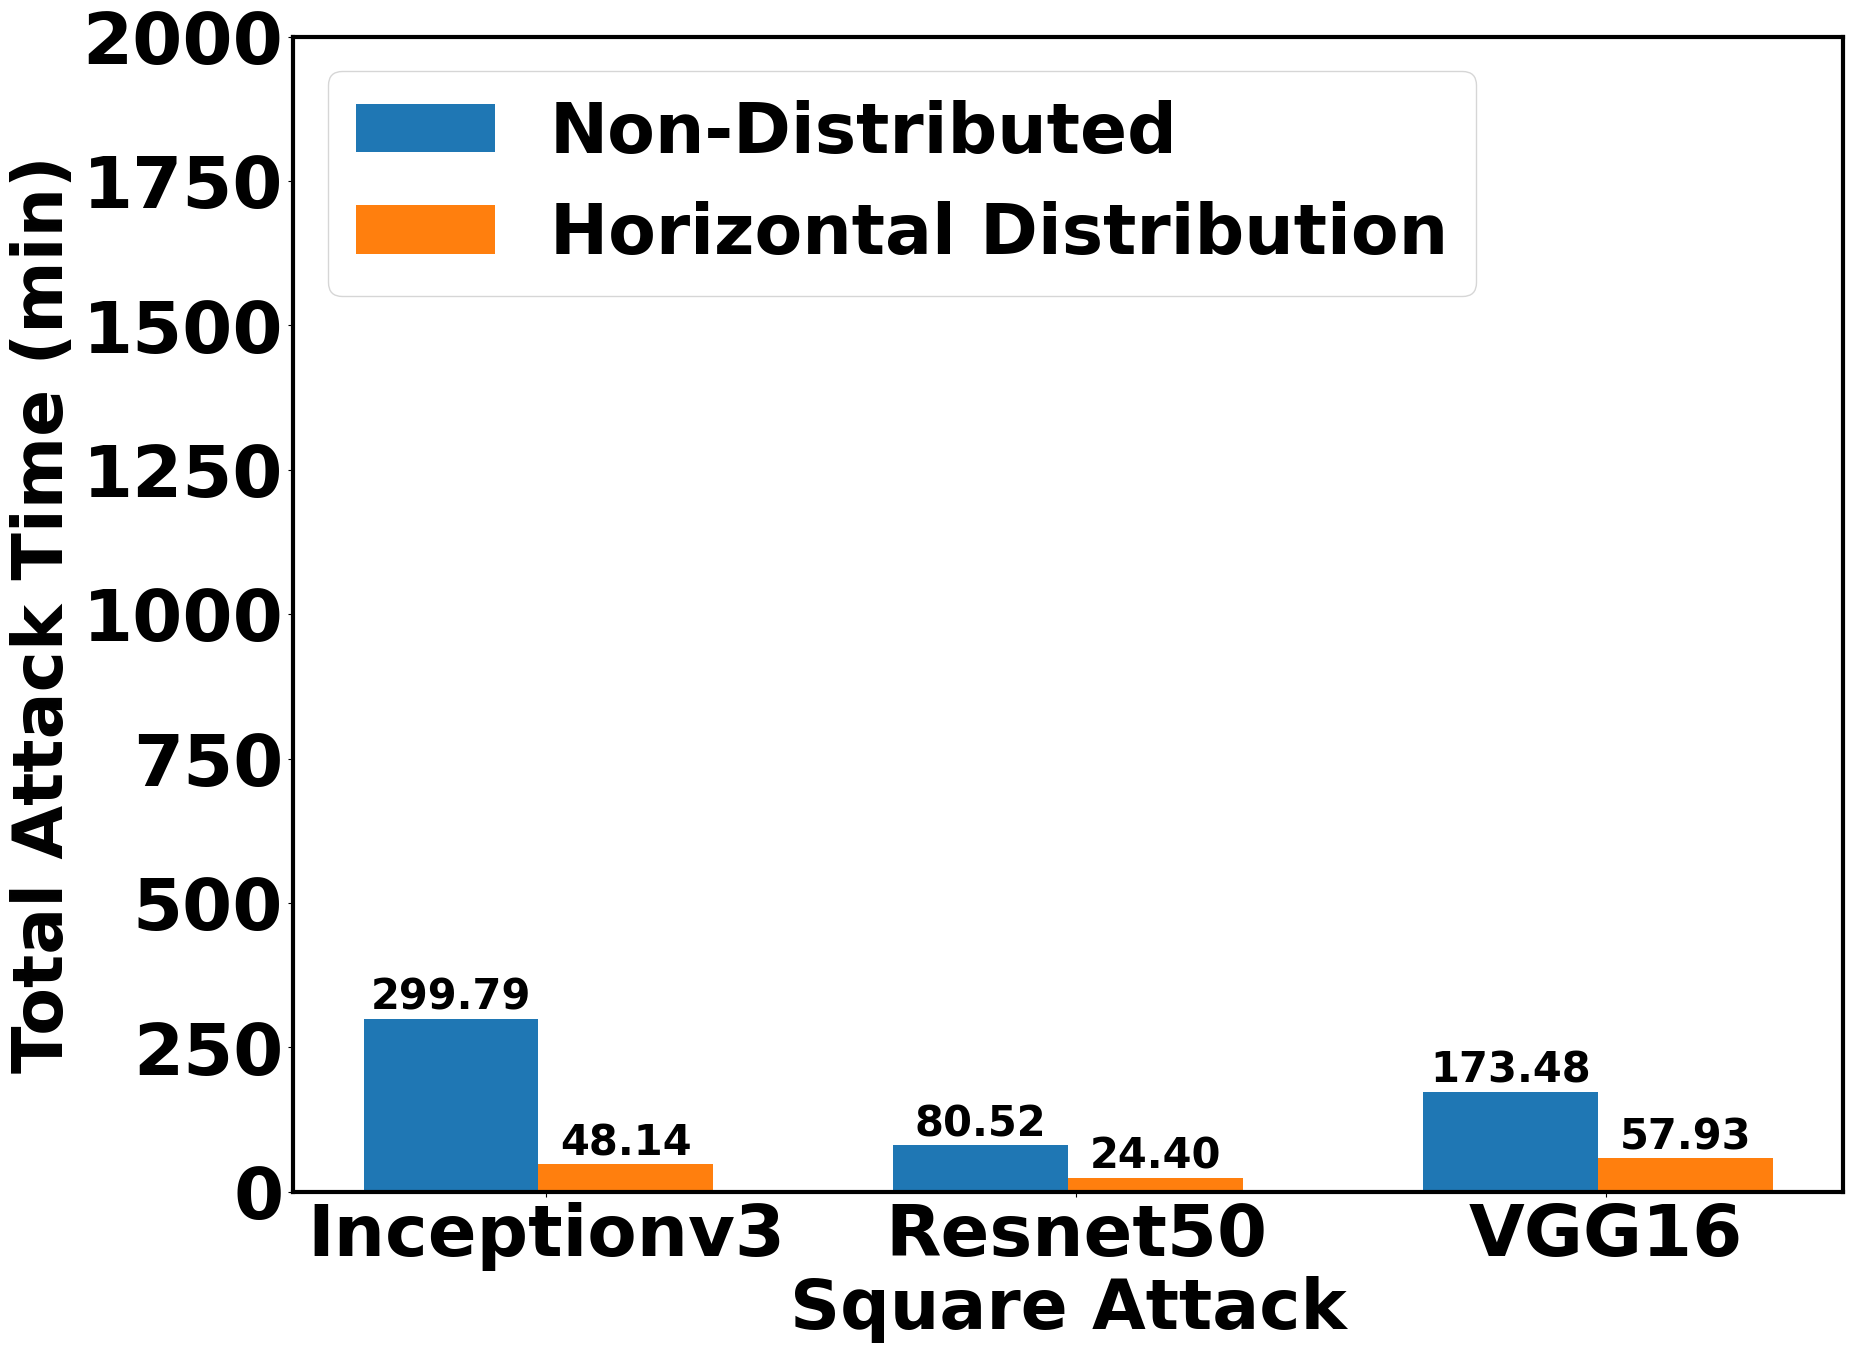

In [90]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Square Attack')
ax.set_ylabel('Total Attack Time (min)')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [square_deepapi_inceptionv3_none_time, square_deepapi_resnet50_none_time, square_deepapi_vgg16_none_time],
        width = barWidth, label ='Non-Distributed')

p2 = plt.bar(br2, [square_deepapi_inceptionv3_horizon_time, square_deepapi_resnet50_horizon_time, square_deepapi_vgg16_horizon_time],
        width = barWidth, label ='Horizontal Distribution')

plt.xticks([r + barWidth  - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 2000])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [91]:
fig.savefig("square_attack_horizontal_time", bbox_inches='tight', pad_inches=0)

## 2.3 Bandits Attack

**Inceptionv3**

In [92]:
def get_tfb_data_333(files, tag):
    data = []
    for file in files:
        reader = SummaryReader(file, extra_columns={'wall_time'})
        data.append(reader.tensors[reader.tensors['tag']== tag]['value'].iloc[333])
    return data

In [93]:
def get_tfb_time_333(files, tag):
    data = []
    for file in files:
        reader = SummaryReader(file, extra_columns={'wall_time'})
        data.append(reader.tensors[reader.tensors['tag']== tag]['wall_time'].iloc[333] - reader.tensors[reader.tensors['tag']== tag]['wall_time'].iloc[0])
    return data

In [94]:
bandits_deepapi_inceptionv3_none_accuracy = get_tfb_data_333(log_bandits_deepapi_inceptionv3_none_file, 'Accuracy')
bandits_deepapi_inceptionv3_none_queries = get_tfb_data_333(log_bandits_deepapi_inceptionv3_none_file, 'Total Mean Number of Queries')
bandits_deepapi_inceptionv3_none_time = get_tfb_time_333(log_bandits_deepapi_inceptionv3_none_file, 'Accuracy')

bandits_deepapi_inceptionv3_none_success_rate = 100 - np.array(bandits_deepapi_inceptionv3_none_accuracy).mean() * 100
bandits_deepapi_inceptionv3_none_queries = np.array(bandits_deepapi_inceptionv3_none_queries).mean()
bandits_deepapi_inceptionv3_none_time = np.array(bandits_deepapi_inceptionv3_none_time).mean() / 60

In [95]:
bandits_deepapi_inceptionv3_none_success_rate, bandits_deepapi_inceptionv3_none_queries, bandits_deepapi_inceptionv3_none_time

(7.692307233810425, 732.47998046875, 760.919728366534)

In [96]:
bandits_deepapi_inceptionv3_horizon_accuracy = get_tfb_data(log_bandits_deepapi_inceptionv3_horizon_file, 'Accuracy')
bandits_deepapi_inceptionv3_horizon_queries = get_tfb_data(log_bandits_deepapi_inceptionv3_horizon_file, 'Total Mean Number of Queries')
bandits_deepapi_inceptionv3_horizon_time = get_tfb_time(log_bandits_deepapi_inceptionv3_horizon_file, 'Accuracy')

bandits_deepapi_inceptionv3_horizon_success_rate = 100 - np.array(bandits_deepapi_inceptionv3_horizon_accuracy).mean() * 100
bandits_deepapi_inceptionv3_horizon_queries = np.array(bandits_deepapi_inceptionv3_horizon_queries).mean()
bandits_deepapi_inceptionv3_horizon_time = np.array(bandits_deepapi_inceptionv3_horizon_time).mean() / 60

In [97]:
bandits_deepapi_inceptionv3_horizon_success_rate, bandits_deepapi_inceptionv3_horizon_queries, bandits_deepapi_inceptionv3_horizon_time

(5.128204822540283, 740.4600219726562, 220.5543538848559)

**Resnet50**

In [98]:
bandits_deepapi_resnet50_none_accuracy = get_tfb_data(log_bandits_deepapi_resnet50_none_file, 'Accuracy')
bandits_deepapi_resnet50_none_queries = get_tfb_data(log_bandits_deepapi_resnet50_none_file, 'Total Mean Number of Queries')
bandits_deepapi_resnet50_none_time = get_tfb_time(log_bandits_deepapi_resnet50_none_file, 'Accuracy')

bandits_deepapi_resnet50_none_success_rate = 100 - np.array(bandits_deepapi_resnet50_none_accuracy).mean() * 100
bandits_deepapi_resnet50_none_queries = np.array(bandits_deepapi_resnet50_none_queries).mean()
bandits_deepapi_resnet50_none_time = np.array(bandits_deepapi_resnet50_none_time).mean() / 60

In [99]:
bandits_deepapi_resnet50_none_success_rate, bandits_deepapi_resnet50_none_queries, bandits_deepapi_resnet50_none_time

(9.333330392837524, 688.3200073242188, 629.6251075347265)

In [100]:
bandits_deepapi_resnet50_horizon_accuracy = get_tfb_data(log_bandits_deepapi_resnet50_horizon_file, 'Accuracy')
bandits_deepapi_resnet50_horizon_queries = get_tfb_data(log_bandits_deepapi_resnet50_horizon_file, 'Total Mean Number of Queries')
bandits_deepapi_resnet50_horizon_time = get_tfb_time(log_bandits_deepapi_resnet50_horizon_file, 'Accuracy')

bandits_deepapi_resnet50_horizon_success_rate = 100 - np.array(bandits_deepapi_resnet50_horizon_accuracy).mean() * 100
bandits_deepapi_resnet50_horizon_queries = np.array(bandits_deepapi_resnet50_horizon_queries).mean()
bandits_deepapi_resnet50_horizon_time = np.array(bandits_deepapi_resnet50_horizon_time).mean() / 60

In [101]:
bandits_deepapi_resnet50_horizon_success_rate, bandits_deepapi_resnet50_horizon_queries, bandits_deepapi_resnet50_horizon_time

(10.66666841506958, 672.5700073242188, 202.19605818192164)

**VGG16**

In [102]:
bandits_deepapi_vgg16_none_accuracy = get_tfb_data(log_bandits_deepapi_vgg16_none_file, 'Accuracy')
bandits_deepapi_vgg16_none_queries = get_tfb_data(log_bandits_deepapi_vgg16_none_file, 'Total Mean Number of Queries')
bandits_deepapi_vgg16_none_time = get_tfb_time(log_bandits_deepapi_vgg16_none_file, 'Accuracy')

bandits_deepapi_vgg16_none_success_rate = 100 - np.array(bandits_deepapi_vgg16_none_accuracy).mean() * 100
bandits_deepapi_vgg16_none_queries = np.array(bandits_deepapi_vgg16_none_queries).mean()
bandits_deepapi_vgg16_none_time = np.array(bandits_deepapi_vgg16_none_time).mean() / 60

In [103]:
bandits_deepapi_vgg16_none_success_rate, bandits_deepapi_vgg16_none_queries, bandits_deepapi_vgg16_none_time

(6.756758689880371, 697.7100219726562, 1339.6080624341964)

In [104]:
bandits_deepapi_vgg16_horizon_accuracy = get_tfb_data(log_bandits_deepapi_vgg16_horizon_file, 'Accuracy')
bandits_deepapi_vgg16_horizon_queries = get_tfb_data(log_bandits_deepapi_vgg16_horizon_file, 'Total Mean Number of Queries')
bandits_deepapi_vgg16_horizon_time = get_tfb_time(log_bandits_deepapi_vgg16_horizon_file, 'Accuracy')

bandits_deepapi_vgg16_horizon_success_rate = 100 - np.array(bandits_deepapi_vgg16_horizon_accuracy).mean() * 100
bandits_deepapi_vgg16_horizon_queries = np.array(bandits_deepapi_vgg16_horizon_queries).mean()
bandits_deepapi_vgg16_horizon_time = np.array(bandits_deepapi_vgg16_horizon_time).mean() / 60

In [105]:
bandits_deepapi_vgg16_horizon_success_rate, bandits_deepapi_vgg16_horizon_queries, bandits_deepapi_vgg16_horizon_time

(5.405408143997192, 706.7999877929688, 291.64958604971565)

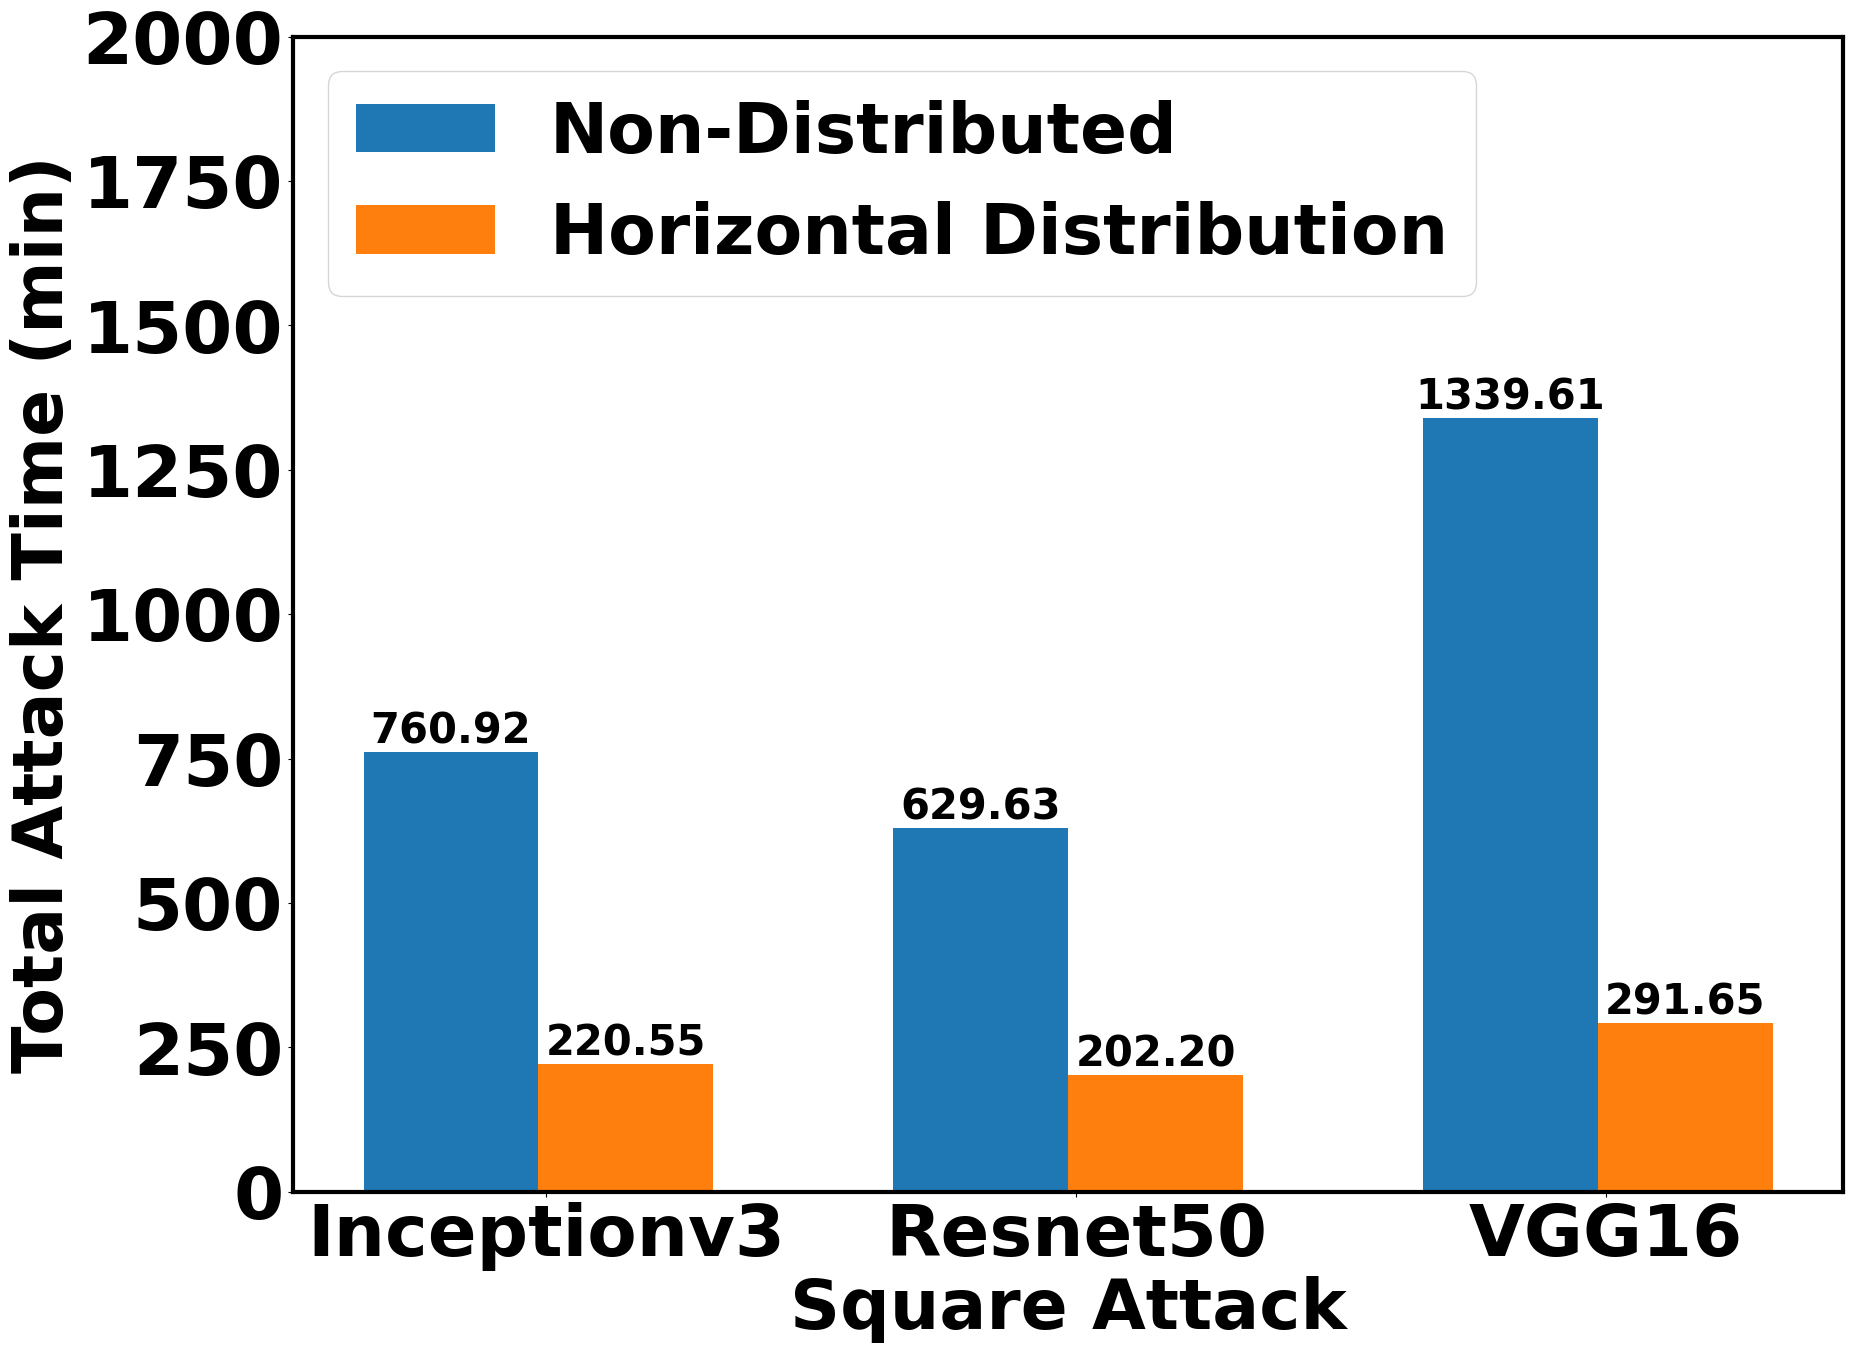

In [106]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Square Attack')
ax.set_ylabel('Total Attack Time (min)')

# creating the bar plot
barWidth = 0.33
br1 = np.arange(3)
br2 = [x + barWidth for x in br1]

p1 = plt.bar(br1, [bandits_deepapi_inceptionv3_none_time, bandits_deepapi_resnet50_none_time, bandits_deepapi_vgg16_none_time],
        width = barWidth, label ='Non-Distributed')

p2 = plt.bar(br2, [bandits_deepapi_inceptionv3_horizon_time, bandits_deepapi_resnet50_horizon_time, bandits_deepapi_vgg16_horizon_time],
        width = barWidth, label ='Horizontal Distribution')

plt.xticks([r + barWidth  - 0.15 for r in range(3)],
        ['Inceptionv3', 'Resnet50', 'VGG16'])

ax.bar_label(p1, label_type='edge', fmt="%.2f")
ax.bar_label(p2, label_type='edge', fmt="%.2f")

ax.set_ylim([0, 2000])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [107]:
fig.savefig("bandits_attack_horizontal_time", bbox_inches='tight', pad_inches=0)

# 3. Vertical Distribution

In [108]:
log_simba_deepapi_inceptionv3_vertical_1_file = get_tfb_file('logs-simba/simba/one/inceptionv3/29/1/')
log_simba_deepapi_inceptionv3_vertical_8_file = get_tfb_file('logs-simba/simba/one/inceptionv3/29/8/')

log_square_deepapi_inceptionv3_vertical_1_file = get_tfb_file('logs-square/square/one/inceptionv3/29/1/')
log_square_deepapi_inceptionv3_vertical_8_file = get_tfb_file('logs-square/square/one/inceptionv3/29/8/')

log_bandits_deepapi_inceptionv3_vertical_1_file = get_tfb_file('logs-bandits/bandits/one/inceptionv3/29/1/')
log_bandits_deepapi_inceptionv3_vertical_8_file = get_tfb_file('logs-bandits/bandits/one/inceptionv3/29/8/')

In [109]:
def get_tfb_plot(files, tag):
    data = []
    for file in files:
        reader = SummaryReader(file, extra_columns={'wall_time'})
        data.append(reader.tensors[reader.tensors['tag']== tag]['value'])
    return data

## 3. 1 Simba

In [110]:
log_simba_deepapi_inceptionv3_vertical_1_margin = get_tfb_plot(log_simba_deepapi_inceptionv3_vertical_1_file, 'Mean Higest Prediction')
log_simba_deepapi_inceptionv3_vertical_8_margin = get_tfb_plot(log_simba_deepapi_inceptionv3_vertical_8_file, 'Mean Higest Prediction')

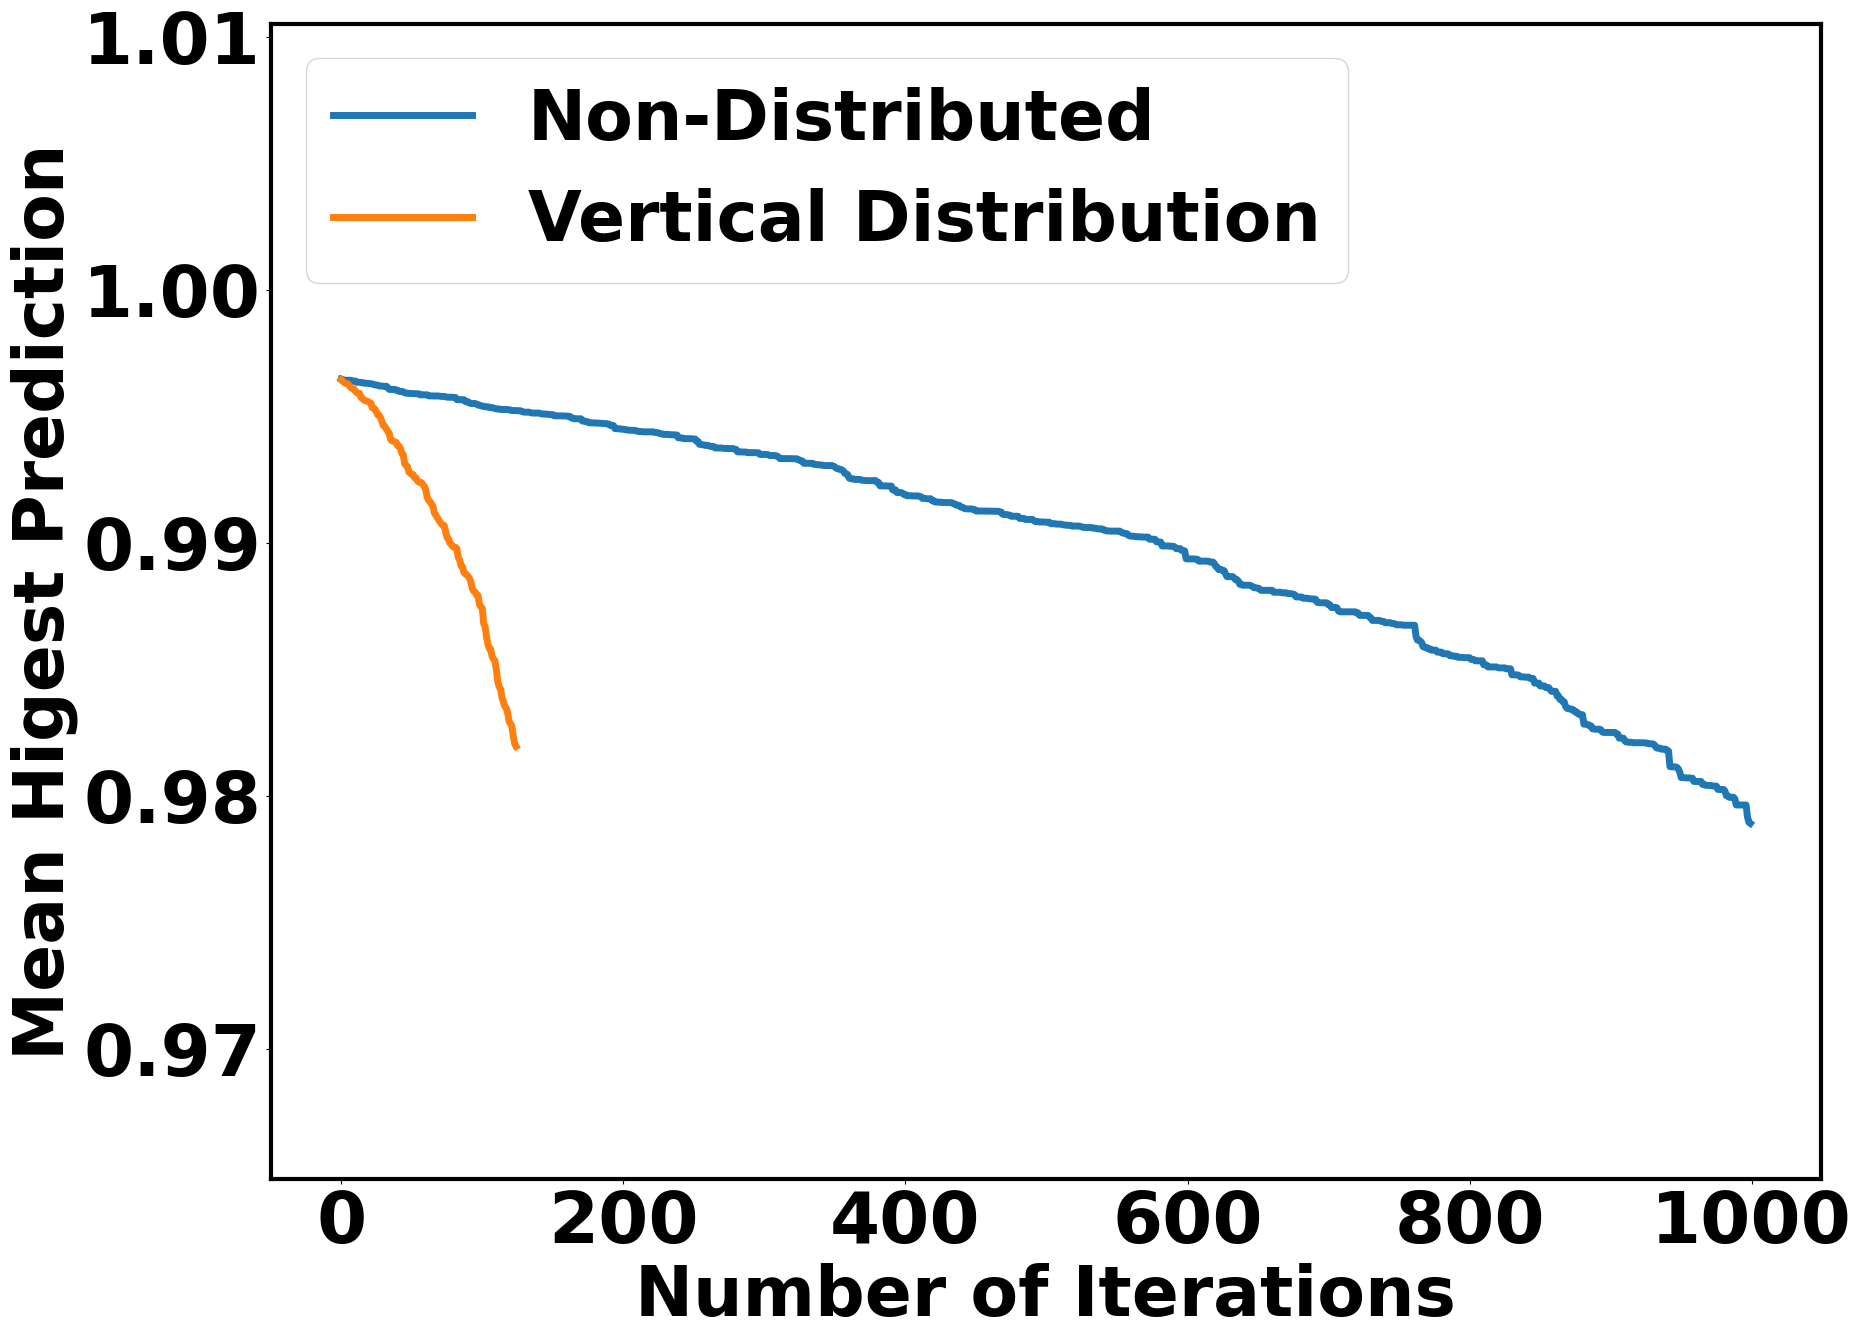

In [111]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Mean Higest Prediction')

p1 = plt.plot(np.array(log_simba_deepapi_inceptionv3_vertical_1_margin[0]), label ='Non-Distributed', linewidth = 5)

p2 = plt.plot(np.array(log_simba_deepapi_inceptionv3_vertical_8_margin[0]), label ='Vertical Distribution', linewidth = 5)

# ax.set_ylim([-0.5, 1.0])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [112]:
fig.savefig("simba_attack_vertical_margin", bbox_inches='tight', pad_inches=0)

## 3.2 Square Attack

In [113]:
log_square_deepapi_inceptionv3_vertical_1_margin = get_tfb_plot(log_square_deepapi_inceptionv3_vertical_1_file, 'Average Margin')
log_square_deepapi_inceptionv3_vertical_8_margin = get_tfb_plot(log_square_deepapi_inceptionv3_vertical_8_file, 'Average Margin')

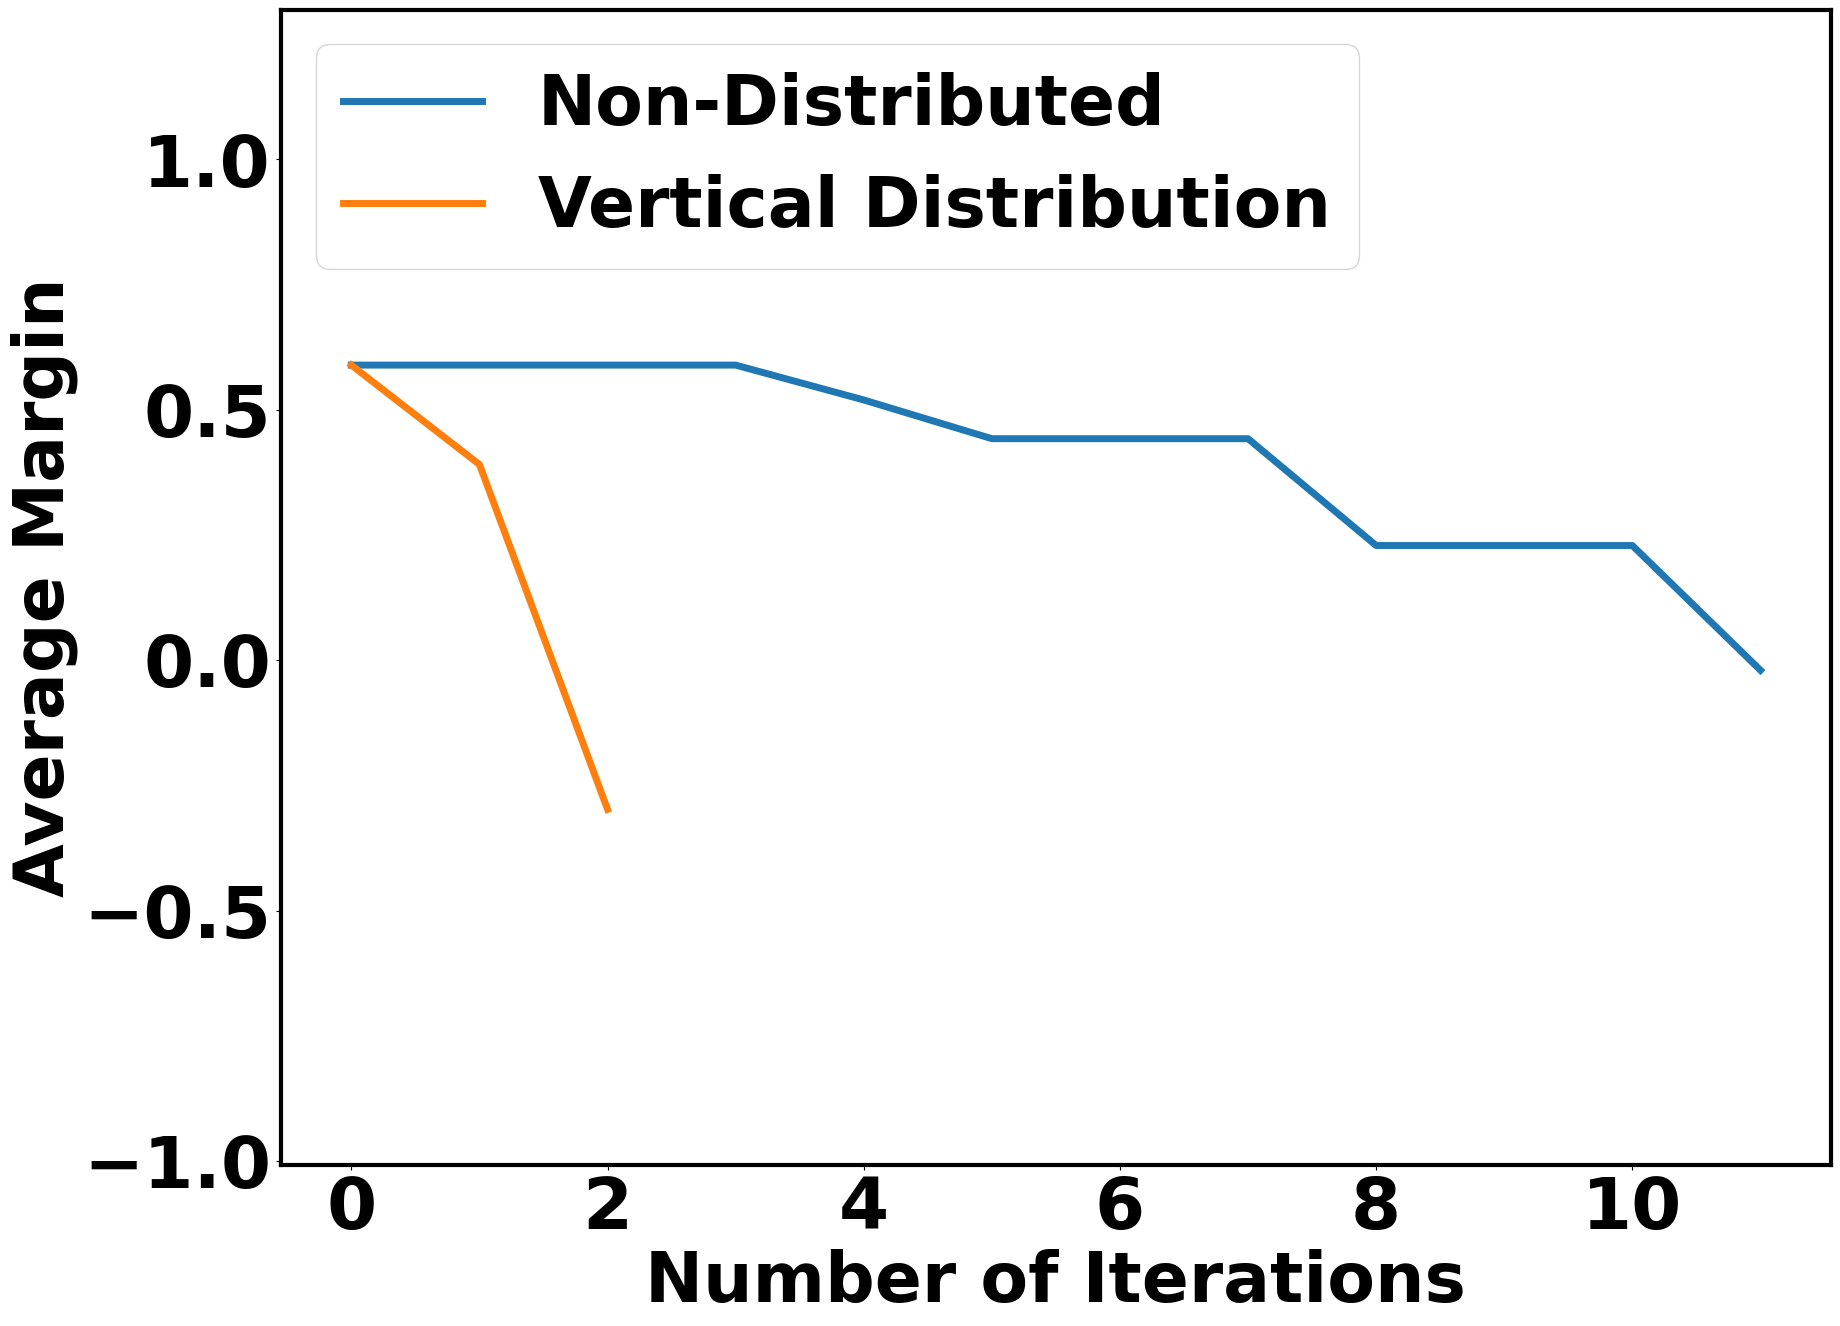

In [114]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Average Margin')

p1 = plt.plot(np.array(log_square_deepapi_inceptionv3_vertical_1_margin[0]), label ='Non-Distributed', linewidth = 5)

p2 = plt.plot(np.array(log_square_deepapi_inceptionv3_vertical_8_margin[0]), label ='Vertical Distribution', linewidth = 5)

# ax.set_ylim([-0.5, 1.0])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [115]:
fig.savefig("square_attack_vertical_margin", bbox_inches='tight', pad_inches=0)

## 3.3 Bandits Attack

In [116]:
log_bandits_deepapi_inceptionv3_vertical_1_margin = get_tfb_plot(log_bandits_deepapi_inceptionv3_vertical_1_file, 'Mean Higest Prediction')
log_bandits_deepapi_inceptionv3_vertical_8_margin = get_tfb_plot(log_bandits_deepapi_inceptionv3_vertical_8_file, 'Mean Higest Prediction')

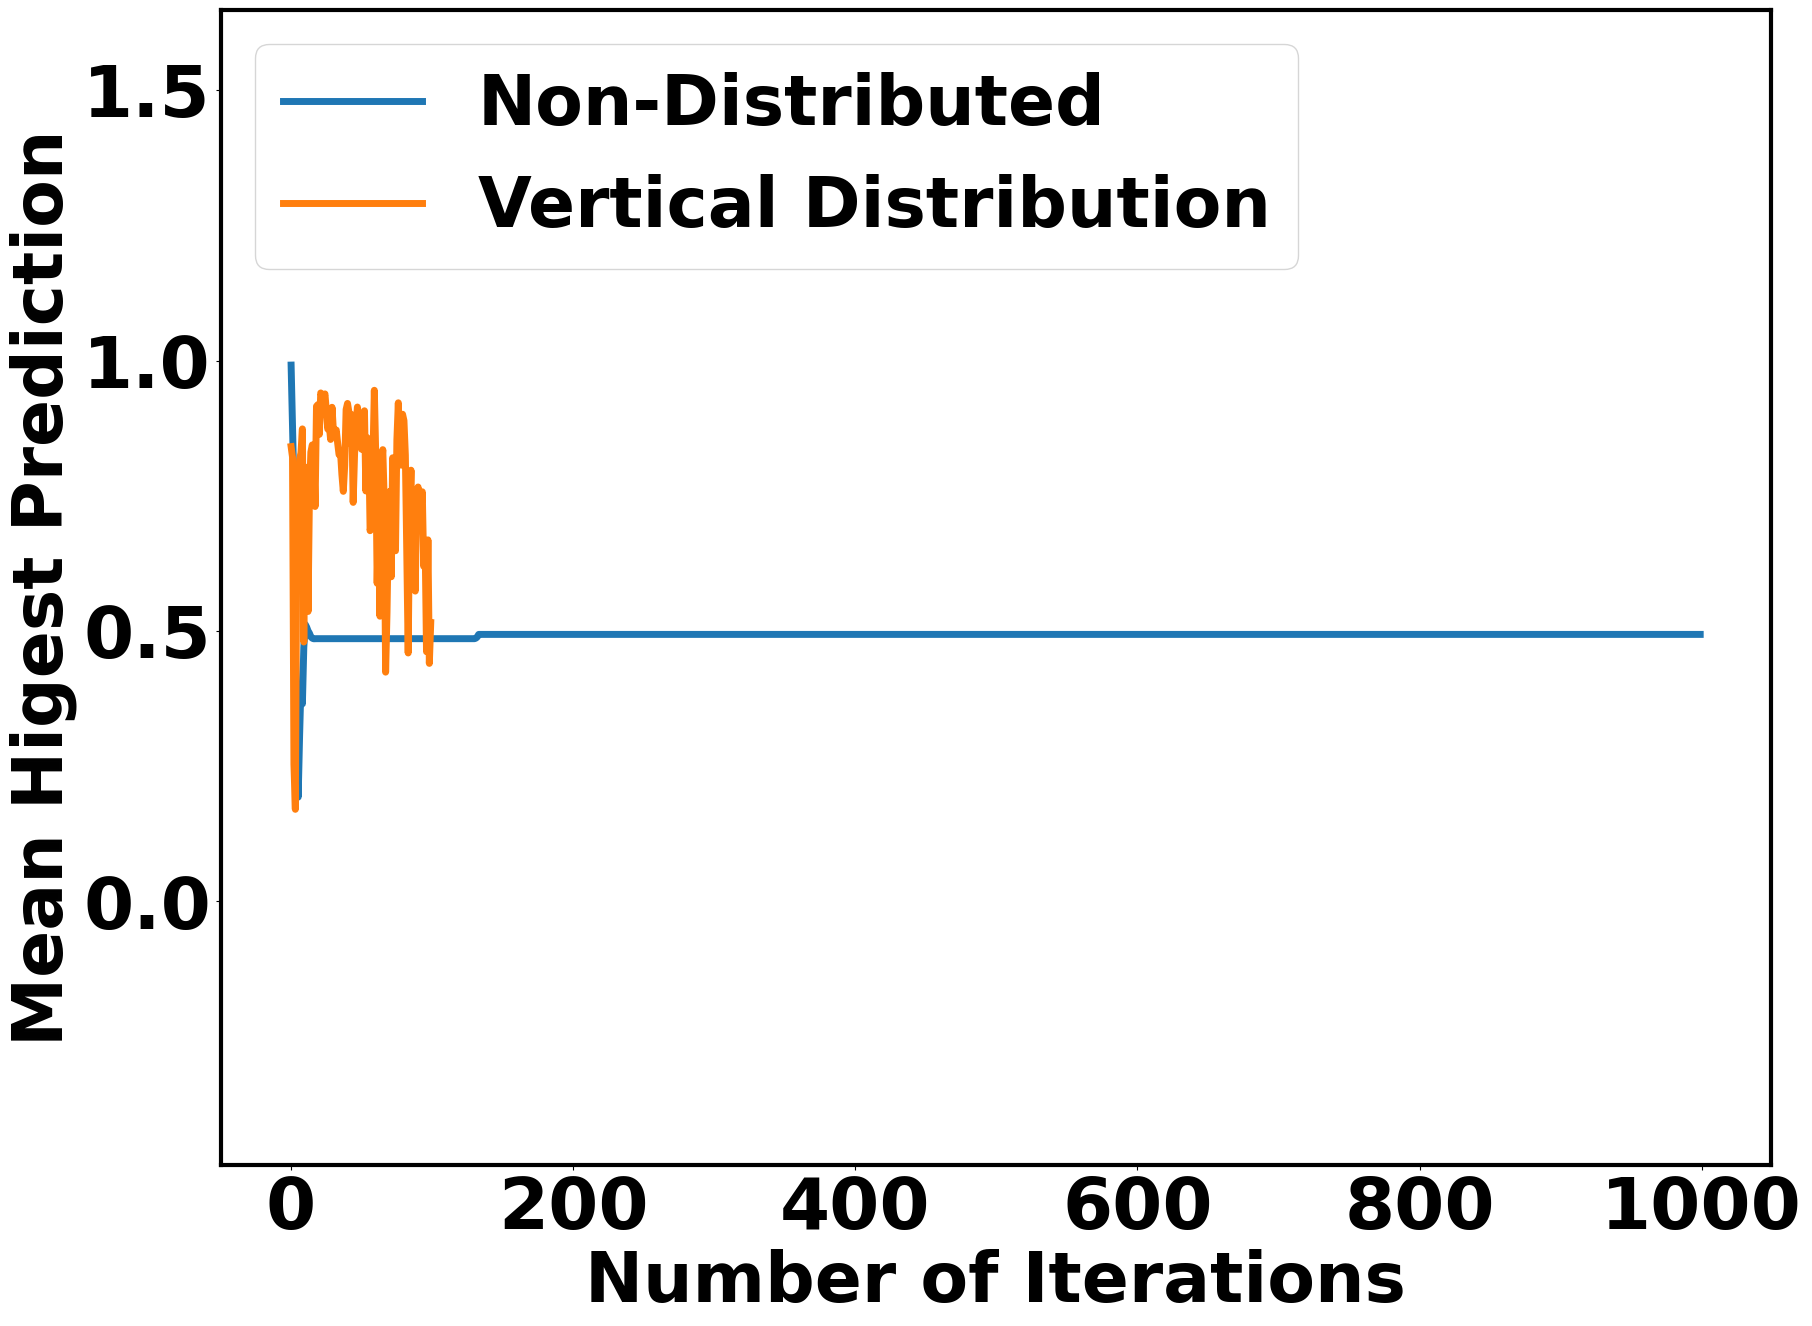

In [117]:
parameters = {'axes.labelsize': 50,
              'axes.labelweight': 'bold',
              'axes.linewidth': 3,
              'xtick.labelsize':'xx-large',
              'ytick.labelsize':'xx-large',
              'figure.figsize': (20, 15),
              'font.size': 30,
              'font.weight' : 'bold'}

plt.rcParams.update(parameters)

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Mean Higest Prediction')

p1 = plt.plot(np.array(log_bandits_deepapi_inceptionv3_vertical_1_margin[0]), label ='Non-Distributed', linewidth = 5)

p2 = plt.plot(np.array(log_bandits_deepapi_inceptionv3_vertical_8_margin[0]), label ='Vertical Distribution', linewidth = 5)

# ax.set_ylim([-0.5, 1.0])
ax.legend(loc="upper left", prop={'size': 50})
ax.margins(y=0.8)

plt.show()

In [118]:
fig.savefig("bandits_attack_vertical_margin", bbox_inches='tight', pad_inches=0)